# Predicting Hotel Cancelations using Logistic Regression and Decision Tree

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out for data-driven solutions. We will analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

Let's load the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/1 Data Science/Project 4 - Clasification/INNHotelsGroup.csv'
df = pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
df.shape

(36275, 18)

- There are 18 columns and 36.275 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

All variables have the correct object type and amount. We can infer that there won't be any missing values. If there were missing values, the object type won't be right, or the values would have to be NaN, which is very unlikely. But of course, we need to check.

In [ ]:
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

- On average, reservations are made for 2 adults, the max number of adults in a single reservation was 4.
- Most reservations do not include kids. And the biggest amount of kids in a reservation was 10.
- Based on the averages, reservations happen more often in the week compared to the weekend.
- Data was gathered between 2017 and 2018. Since the range is that low, that variable is probably non significant.
- Average price of the room is $103.4 euros.

In [ ]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

### Let's check for duplicated values:

In [ ]:
duplicates = df.duplicated()

duplicates.value_counts()

False    36275
dtype: int64

Based on this, there are no duplicates. However, this is likely due to the booking_ID variable that distinguishes all rows, like a primary key. Let's drop it for those reasons and because we won't need it for the model.

In [ ]:
df_test = df.drop(['Booking_ID'], axis=1)

In [ ]:
duplicates1 = df_test.duplicated()

duplicates1.value_counts()

False    26000
True     10275
dtype: int64

There are 10.275 duplicated values.

The number of duplicated values is too high; close to 1/3 of the entire data frame. Probably, due to the nature of bookings, the hotel had to include the unique identifier to distinguish bookings that were virtually the same, or 'duplicates', but are from different customers and valuable for the model.

For that reason we'll still drop the Booking_ID column, but won't delete those dupllicates. We'll keep using the original data frame df.

In [ ]:
df = df.drop(['Booking_ID'], axis =1)

Now, let's change the booking status column from a string to an integer. We need to do this to run the models.

In [ ]:
df["booking_status"] = df["booking_status"].replace({'Canceled':1, 'Not_Canceled':0})
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

## Exploratory Data Analysis

### Plot functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analisys

#### Numerical

##### no_of_adults

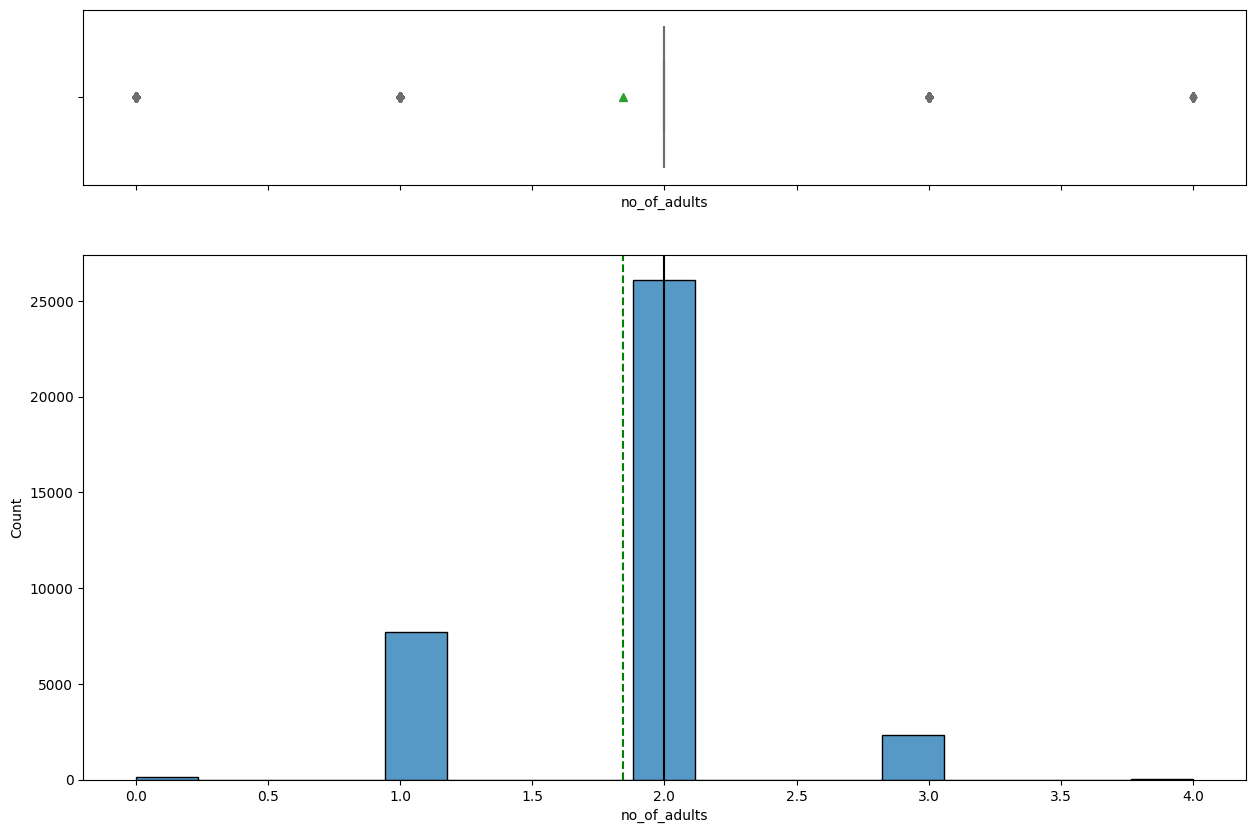

In [ ]:
histogram_boxplot(df, 'no_of_adults')

A bit more than 25.000 reservations were done for 2 adults. The reservation with 0 adults could've been just for kids, although unlikely, or an error.

##### no_of_children

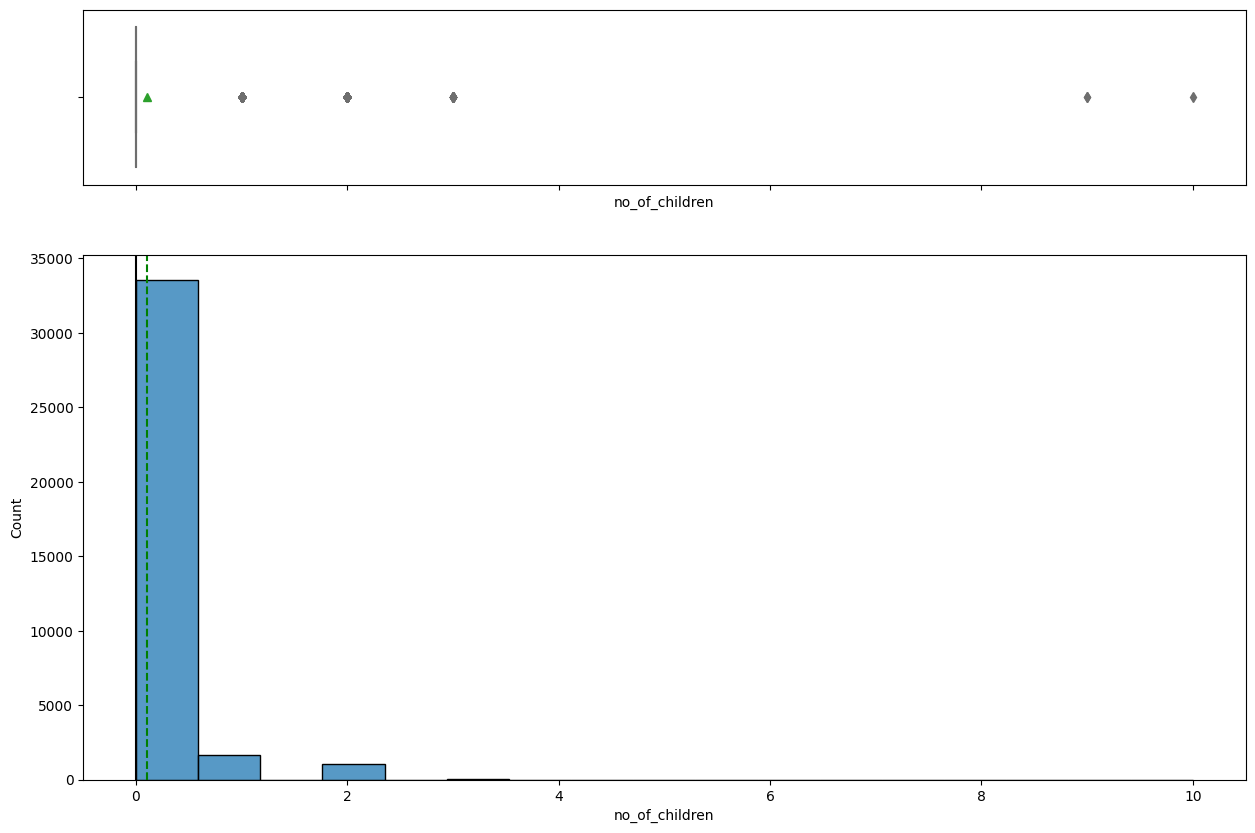

In [ ]:
histogram_boxplot(df, 'no_of_children')

Most reservations were done without children. This could mean that the hotel is more suited for adults than kids.

##### no_of_weekend_nights

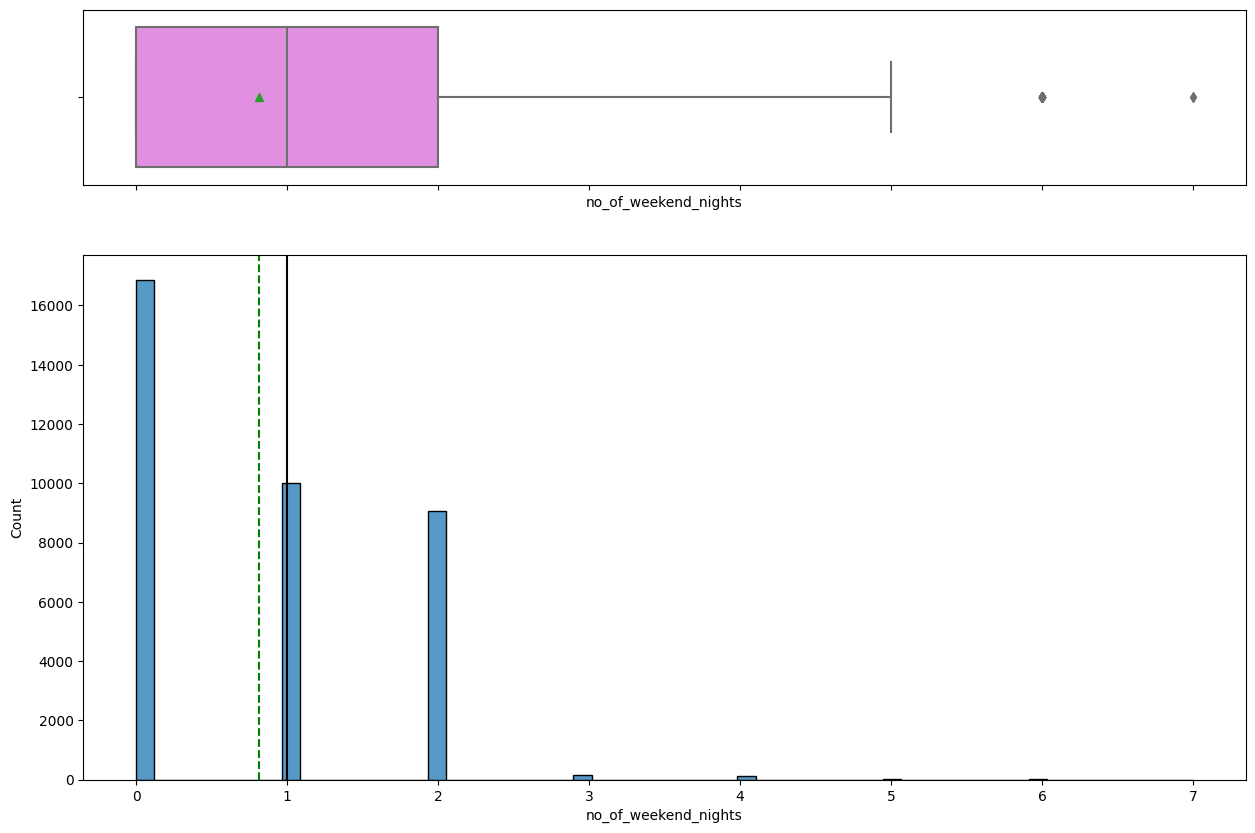

In [ ]:
histogram_boxplot(df, 'no_of_weekend_nights')

Around 10.000 reservations had 1 weekend night, and around 9.000 had 2 weekend nights. The majority had no weekend nights. It's very close to a 50/50 or 40/60 of no weekend nights vs weekend nights.

##### no_of_week_nights

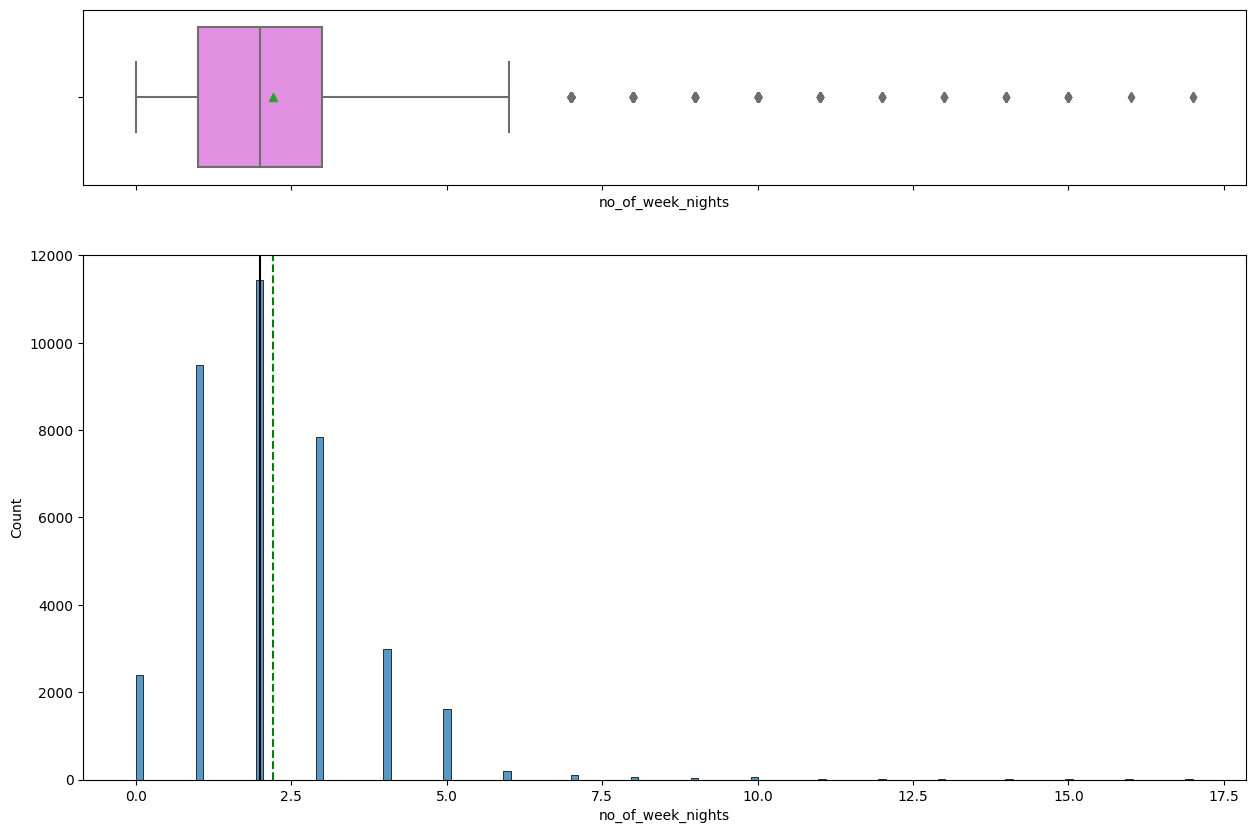

In [ ]:
histogram_boxplot(df, 'no_of_week_nights')

On average, reservations had around 2 week nights. Most were between 0 and 5, and very few were over 5 week nights.

##### required_car_parking_space

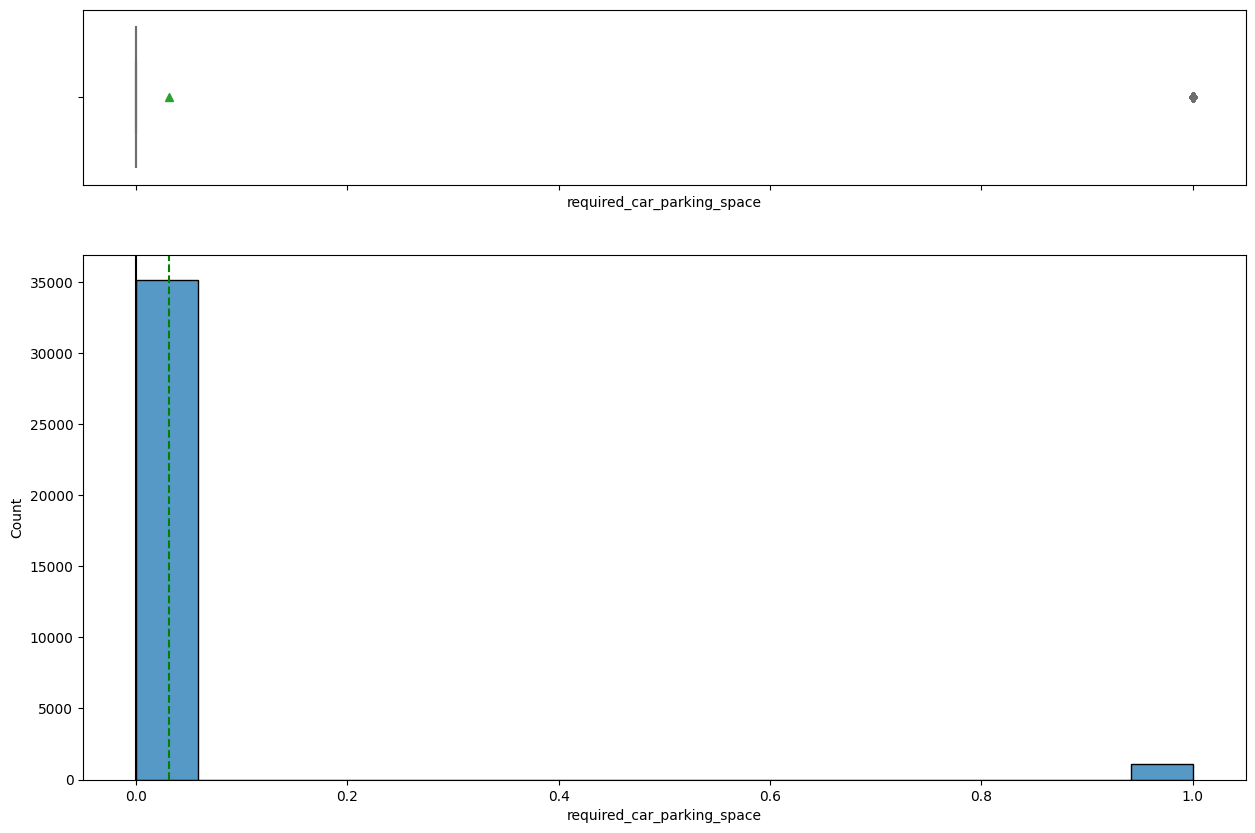

In [ ]:
histogram_boxplot(df, 'required_car_parking_space')

More than 90% of the reservations did not requested a car parking space. This insinuates people traveled by plane or other transportation method that made it impossible to bring their own car.

##### lead_time

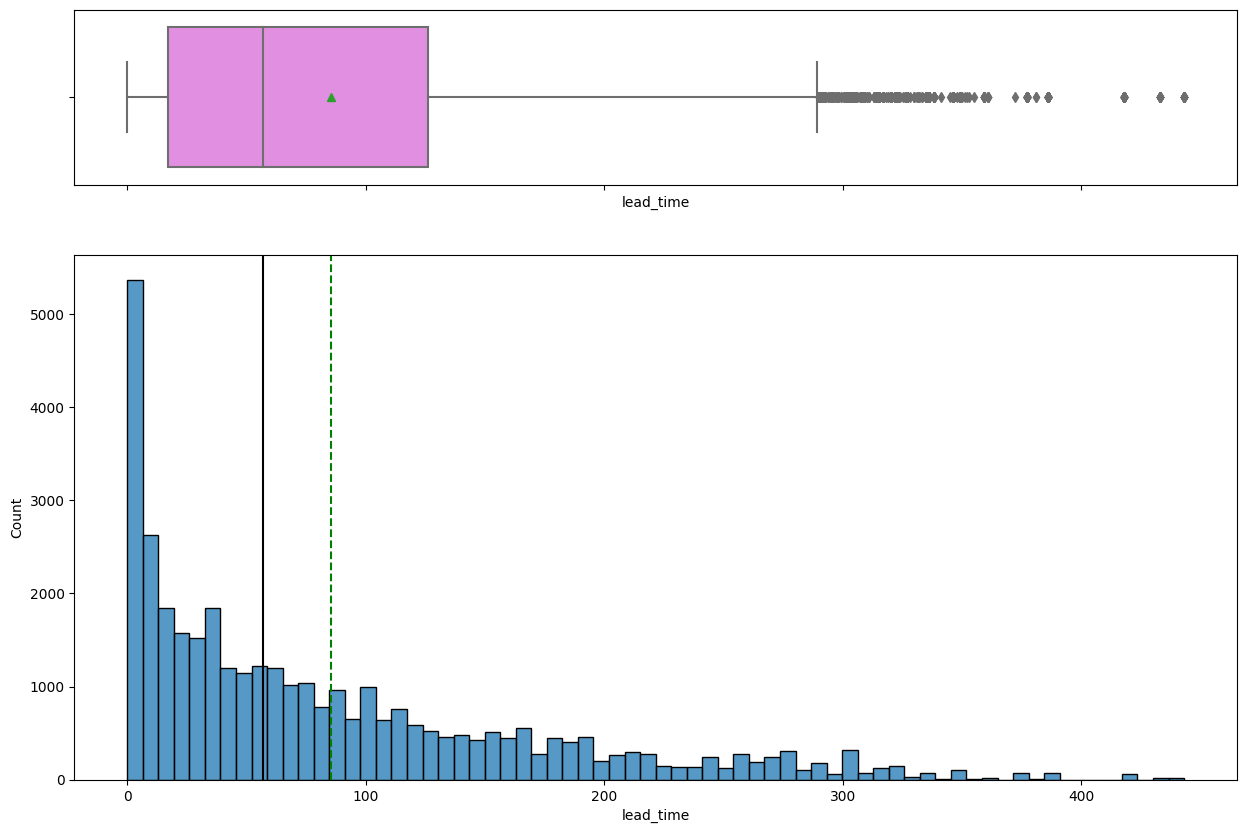

In [ ]:
histogram_boxplot(df, 'lead_time')

Most bookings were made close to the arrival date. There's a very high count around 1-5 days from the arrival date, and then decreases at a constant rate until reaching 400+ days.

##### arrival_year

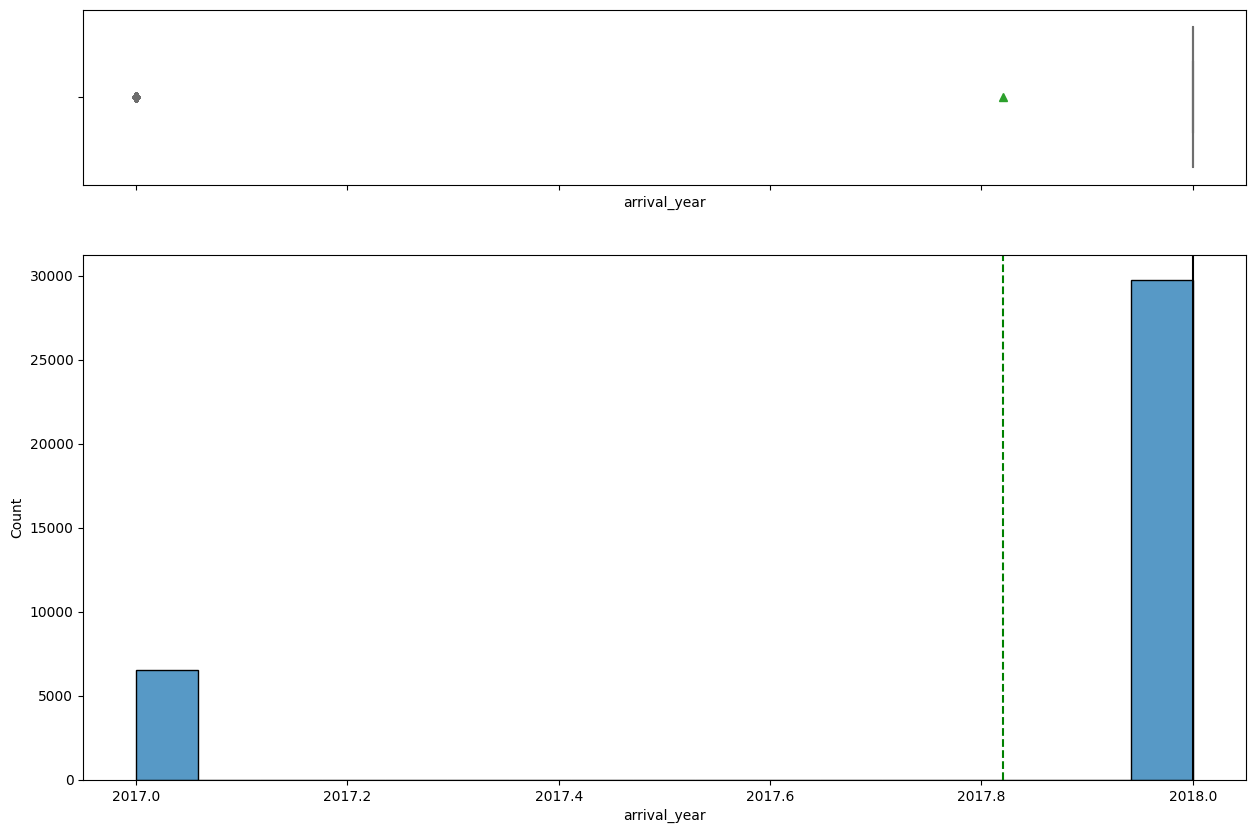

In [ ]:
histogram_boxplot(df, 'arrival_year')

More than 80% of the bookings had 2018 as the arrival date.

##### arrival_month

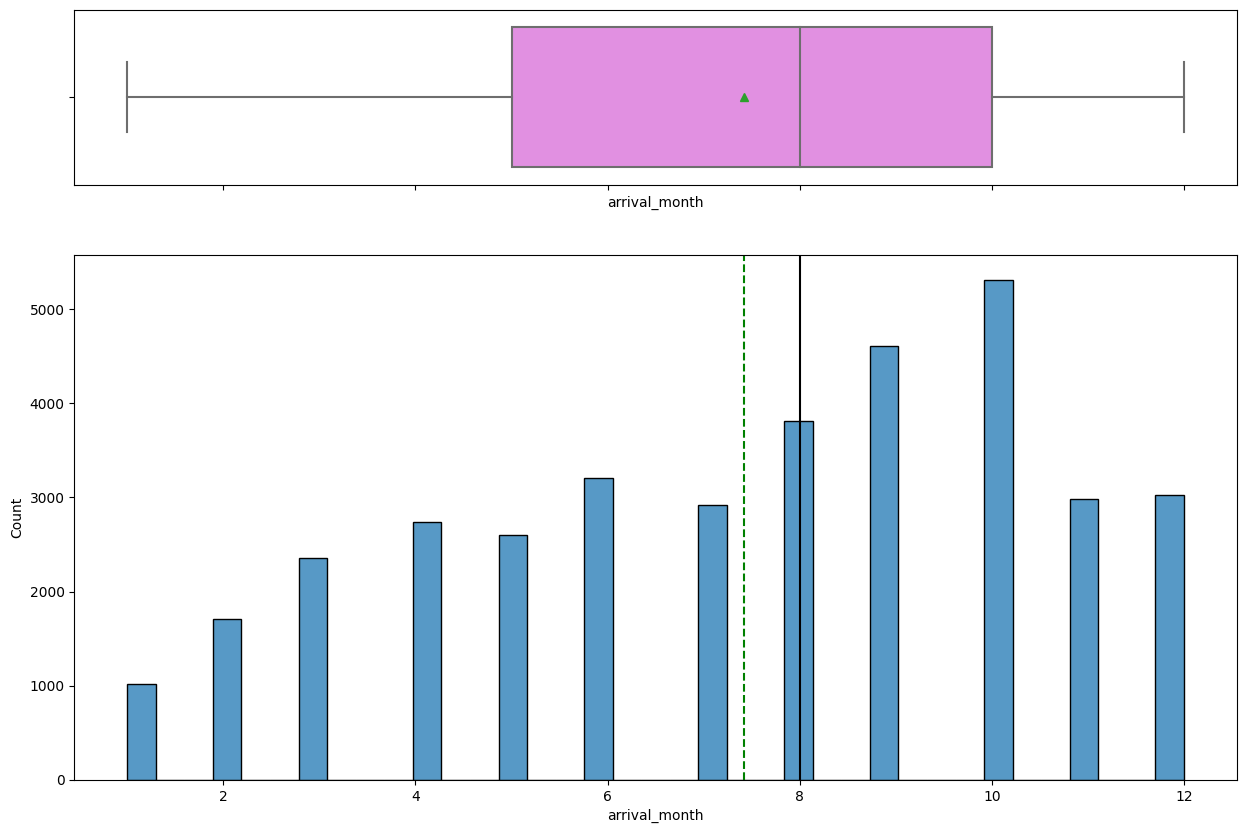

In [ ]:
histogram_boxplot(df, 'arrival_month')

The months with the highest reservation arrival date are August, September, and October. One could've guessed december and January would've been better months, but people prefer other months. This could be due to price increases, or that INN hotels group's hotels are not suited for the winter.

##### arrival_date

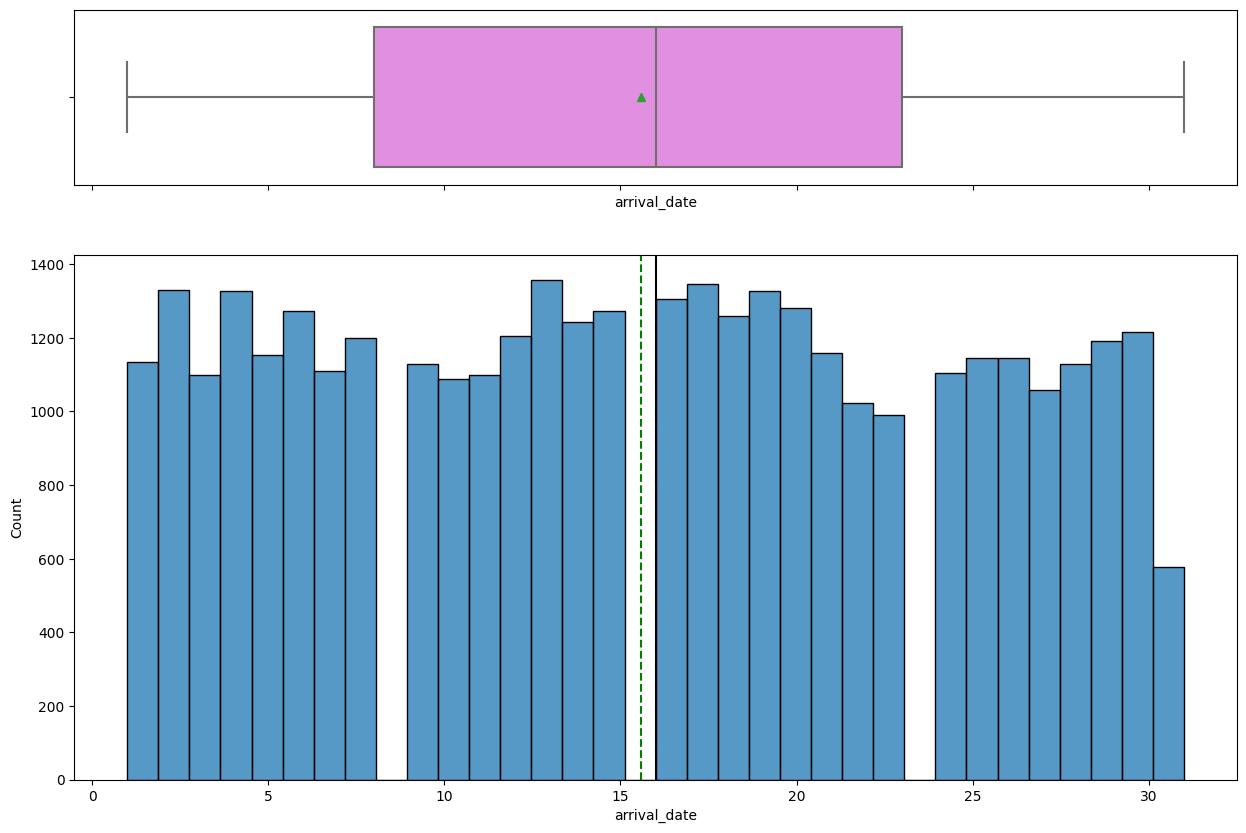

In [ ]:
histogram_boxplot(df, 'arrival_date')

There's a pretty uniform distribution, therefore there is not a clear preference for a specific arrival day.

##### no_of_previous_cancellations

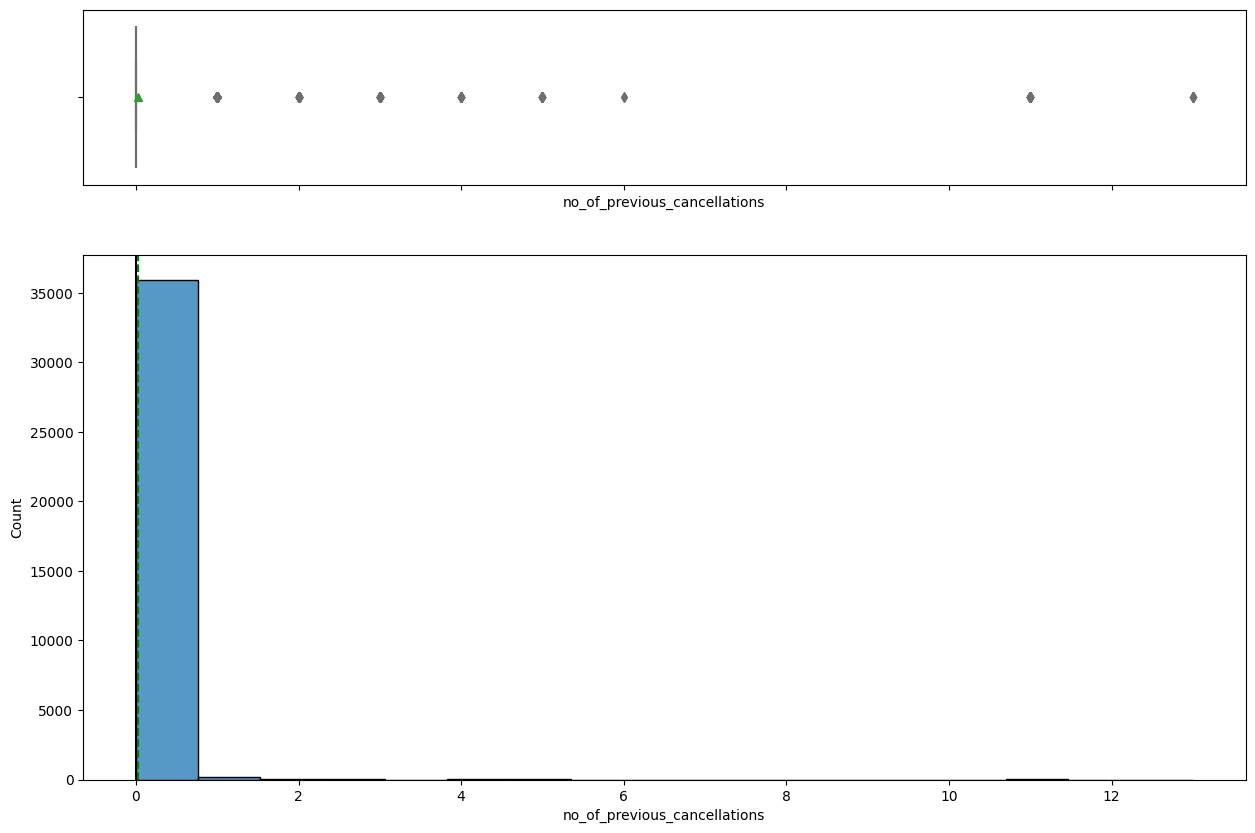

In [ ]:
histogram_boxplot(df, 'no_of_previous_cancellations')

99% of customers haven't canceled in the past.

##### no_of_previous_bookings_not_canceled

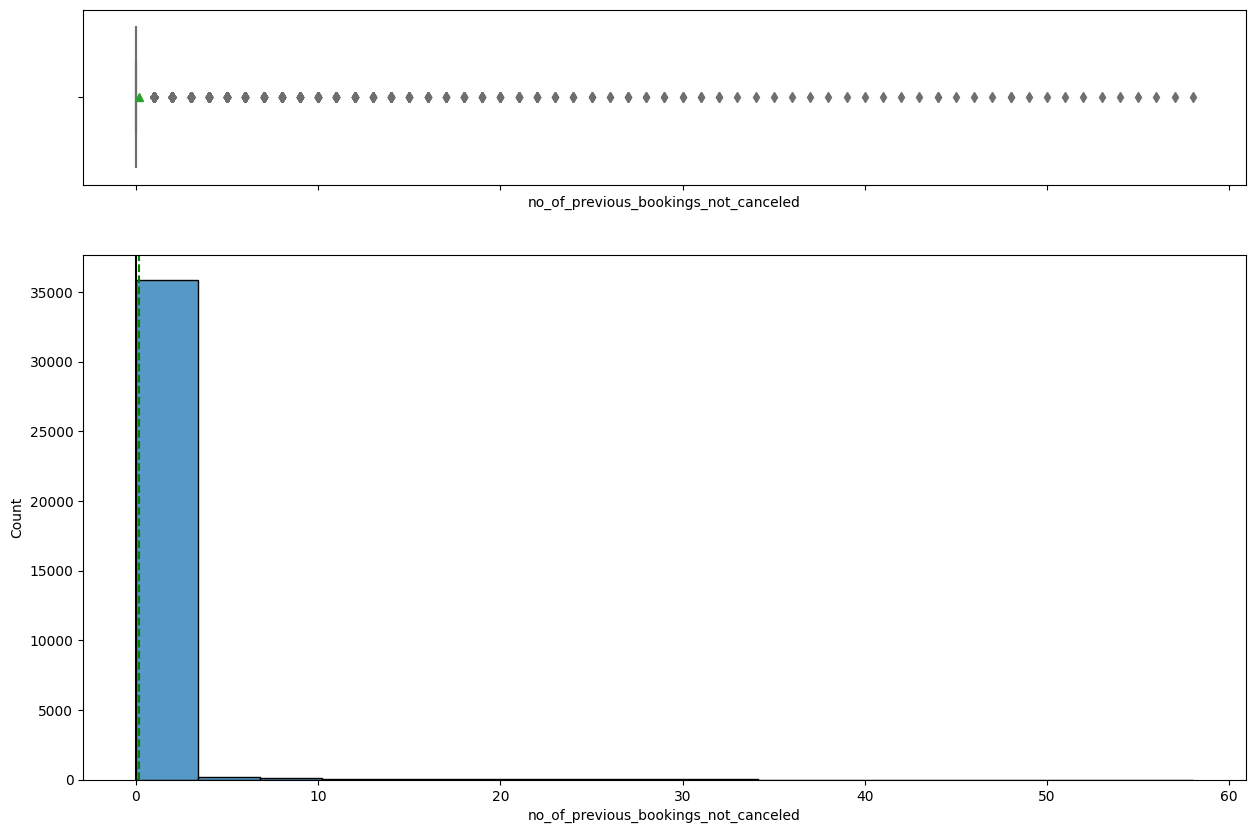

In [ ]:
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')

Same as the previous, pretty much most of them have not canceled bookings in the past.

##### avg_price_per_room

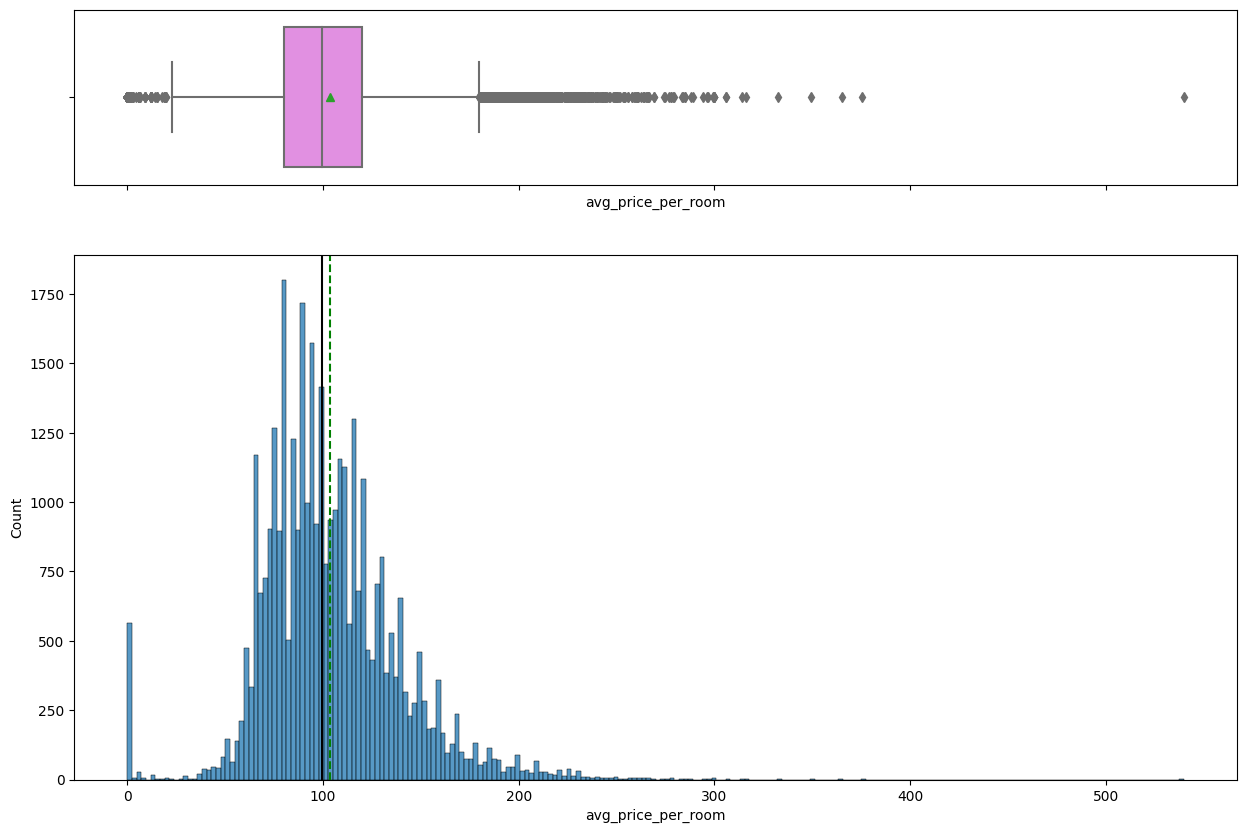

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')

Average price per room is around $100 euros. There's a semi-normal distribution towards that price. However, there are some rooms that had prices close to $0 euros, should be looked at.

##### no_of_special_requests

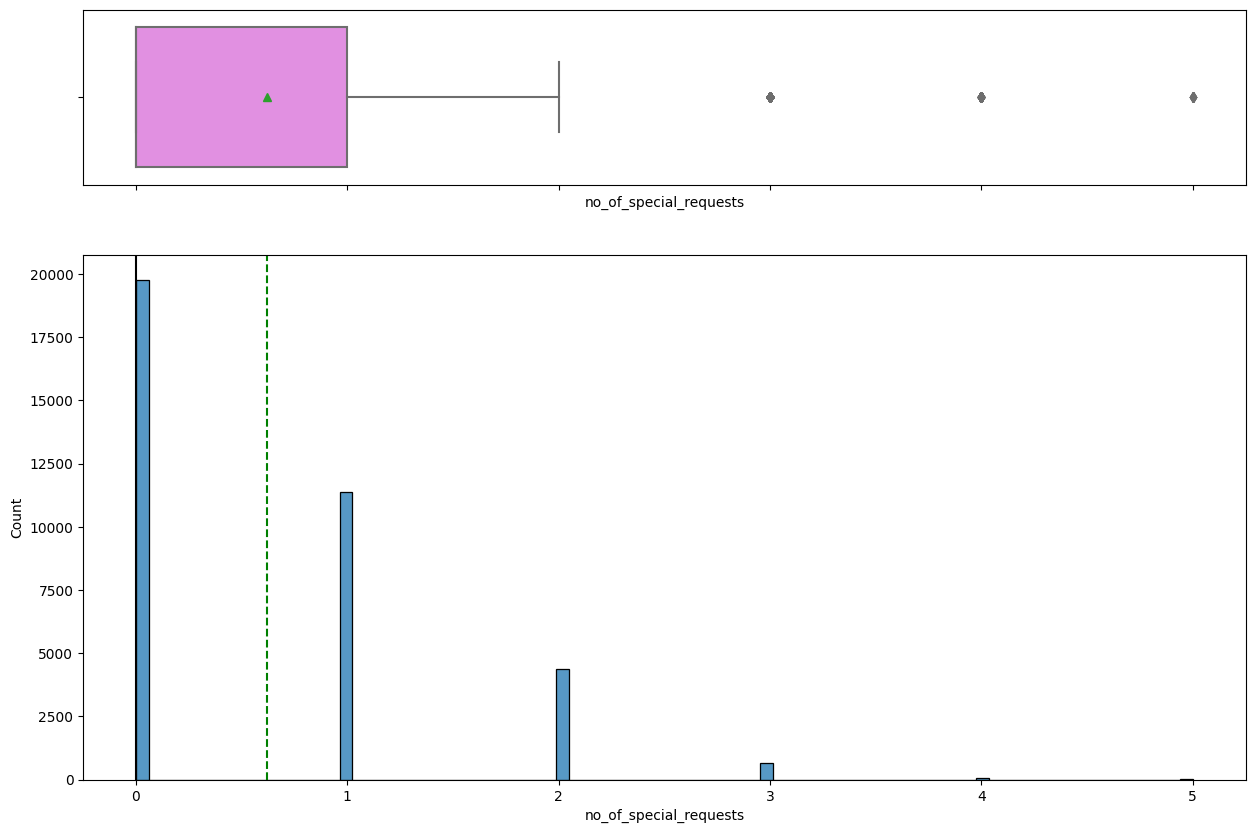

In [ ]:
histogram_boxplot(df, 'no_of_special_requests')

Most customers did not make any special requests, almost 20.000. Around 11.000 made 1 special request, around 5.000 made 2, and lower than 1.000 made 3, 4, or 5 special requests.

##### booking_status

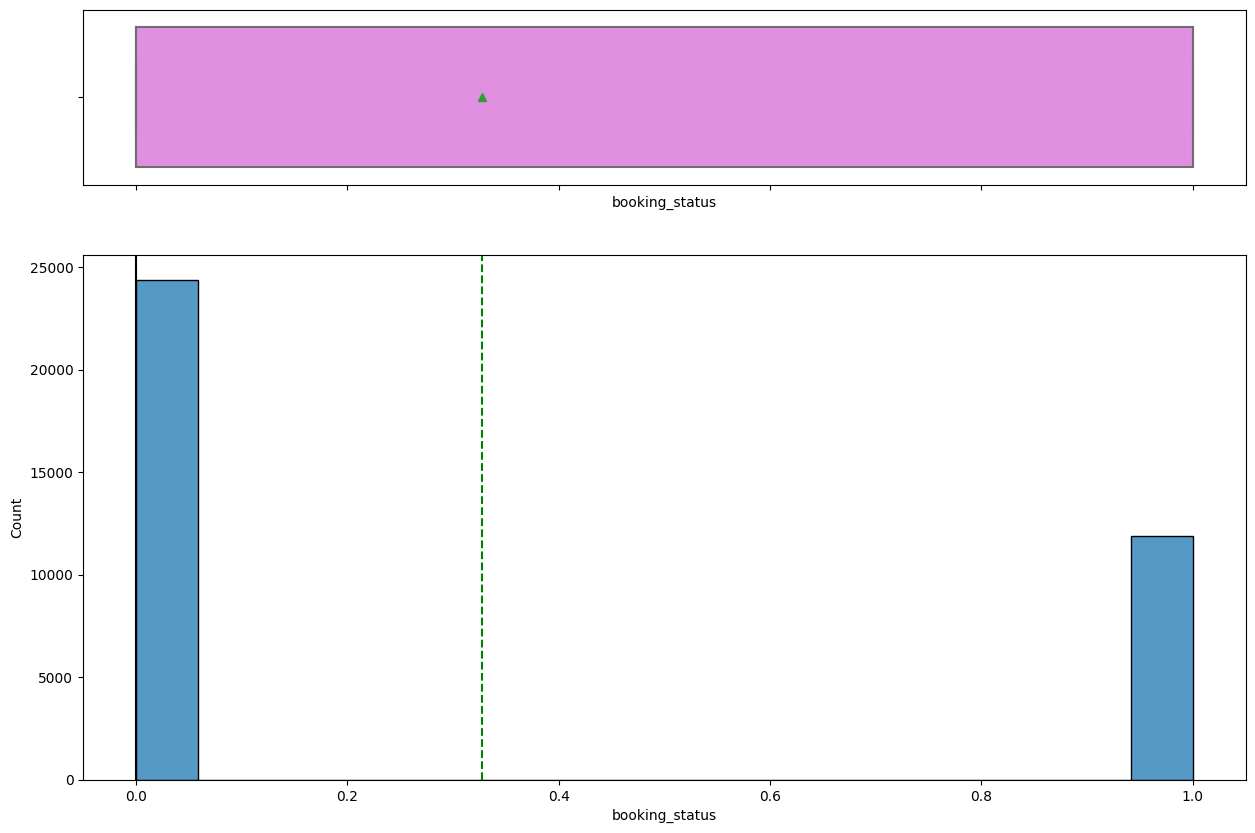

In [ ]:
histogram_boxplot(df, 'booking_status')

In [ ]:
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

24.390 bookings were not canceled, and 11.885 were cancelled. Around 2/3 not canceled, and around 1/3 canceled.

#### Categorical

##### type_of_meal_plan

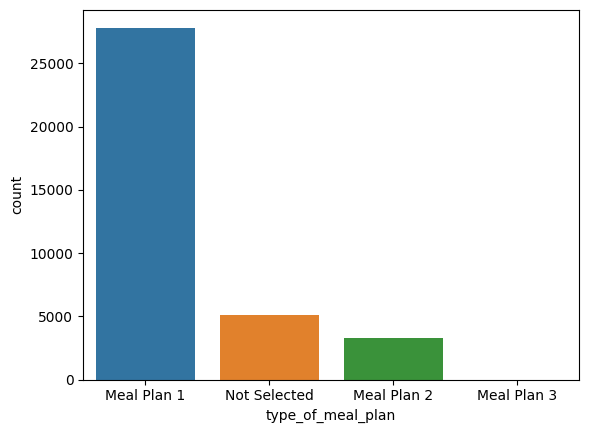

In [ ]:
sns.countplot(data=df, x=df['type_of_meal_plan'])
plt.show()

More than 2/3 of the entire reservations went for meal plan 1.

##### room_type_reserved

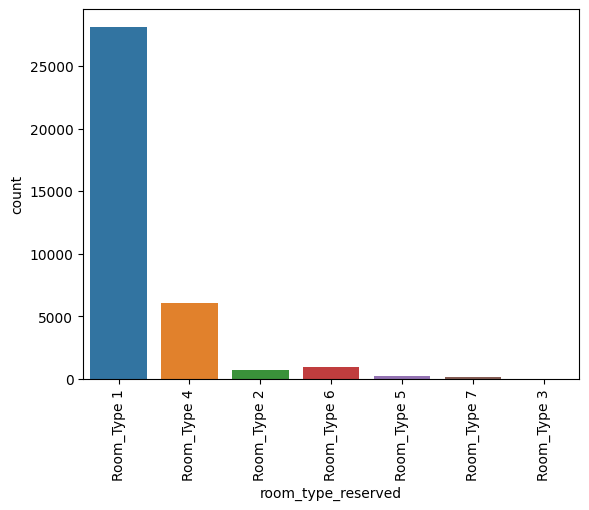

In [ ]:
sns.countplot(data=df, x=df['room_type_reserved'])
plt.xticks(rotation = 90)
plt.show()

Similar to the meal plan, more than 2/3 went for room type 1, which is by far the most popular.

##### market_segment_type

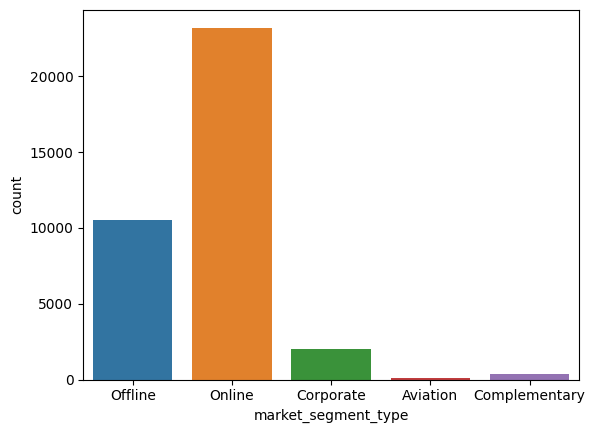

In [ ]:
sns.countplot(data=df, x=df['market_segment_type'])
plt.show()

Around 25.000 reservations were online, a bit more of 10.000 offline, and the rest between corporate, aviation, and complementary.

### Bivariate Analysis

#### General

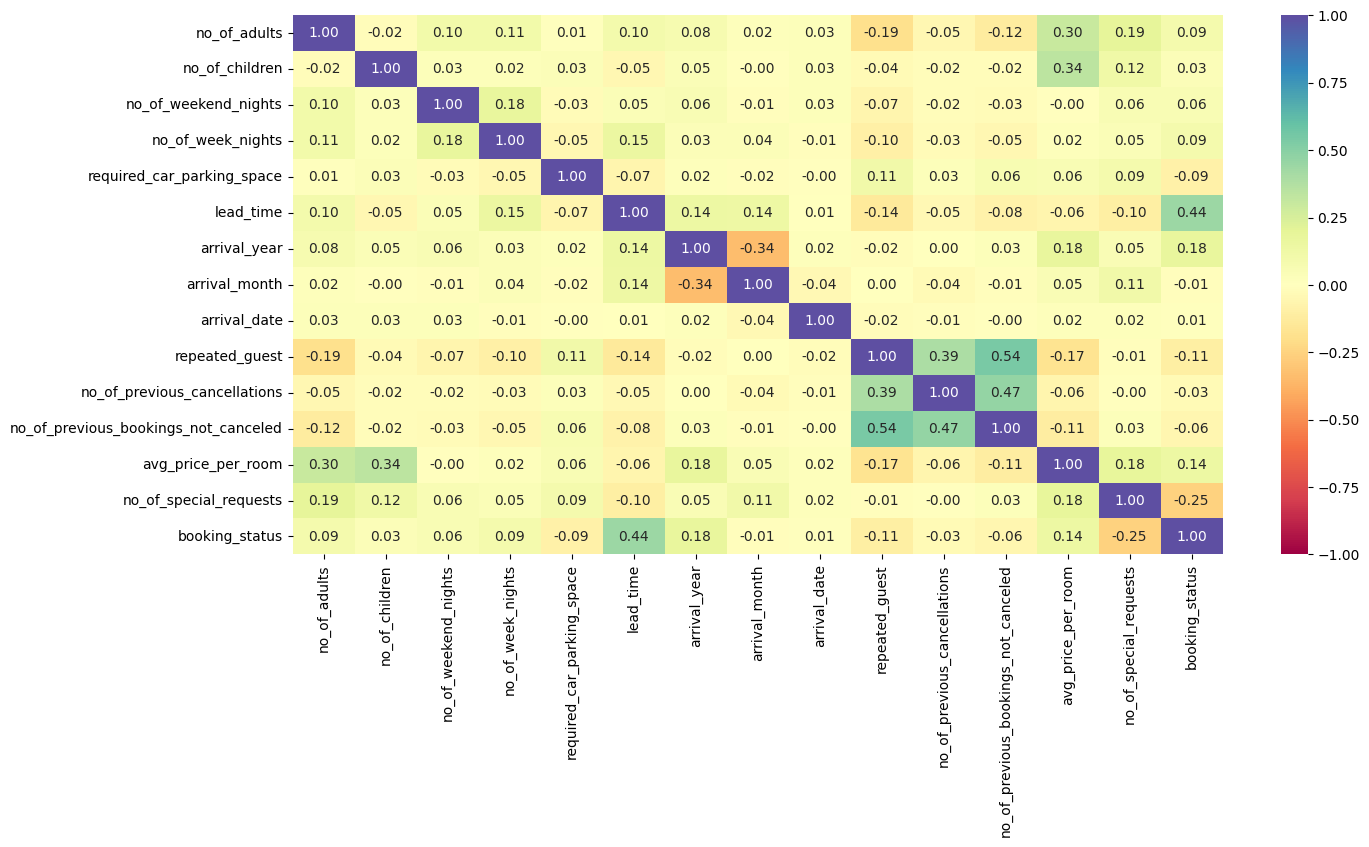

In [ ]:
# To create the heatmap, I'll create a list of only the numerical variables
corr_list = df.select_dtypes(include=np.number).columns.tolist()

# Now let's plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- No of previous cancelations and repeated guest have some correlation, but of course it's expected, same with no of bookings not canceled. We'll check the VIF later on.
- No of bookings not canceled and no of bookings not canceled also have high correlation, will check VIF.
- Booking status and lead time also have correlation, probably the greater the lead time the lower the chances of canceling, but we need to check.

In [ ]:
# Fisr, let's create a dataframe with only the numerical variables
numerical = df.select_dtypes(include=np.number)

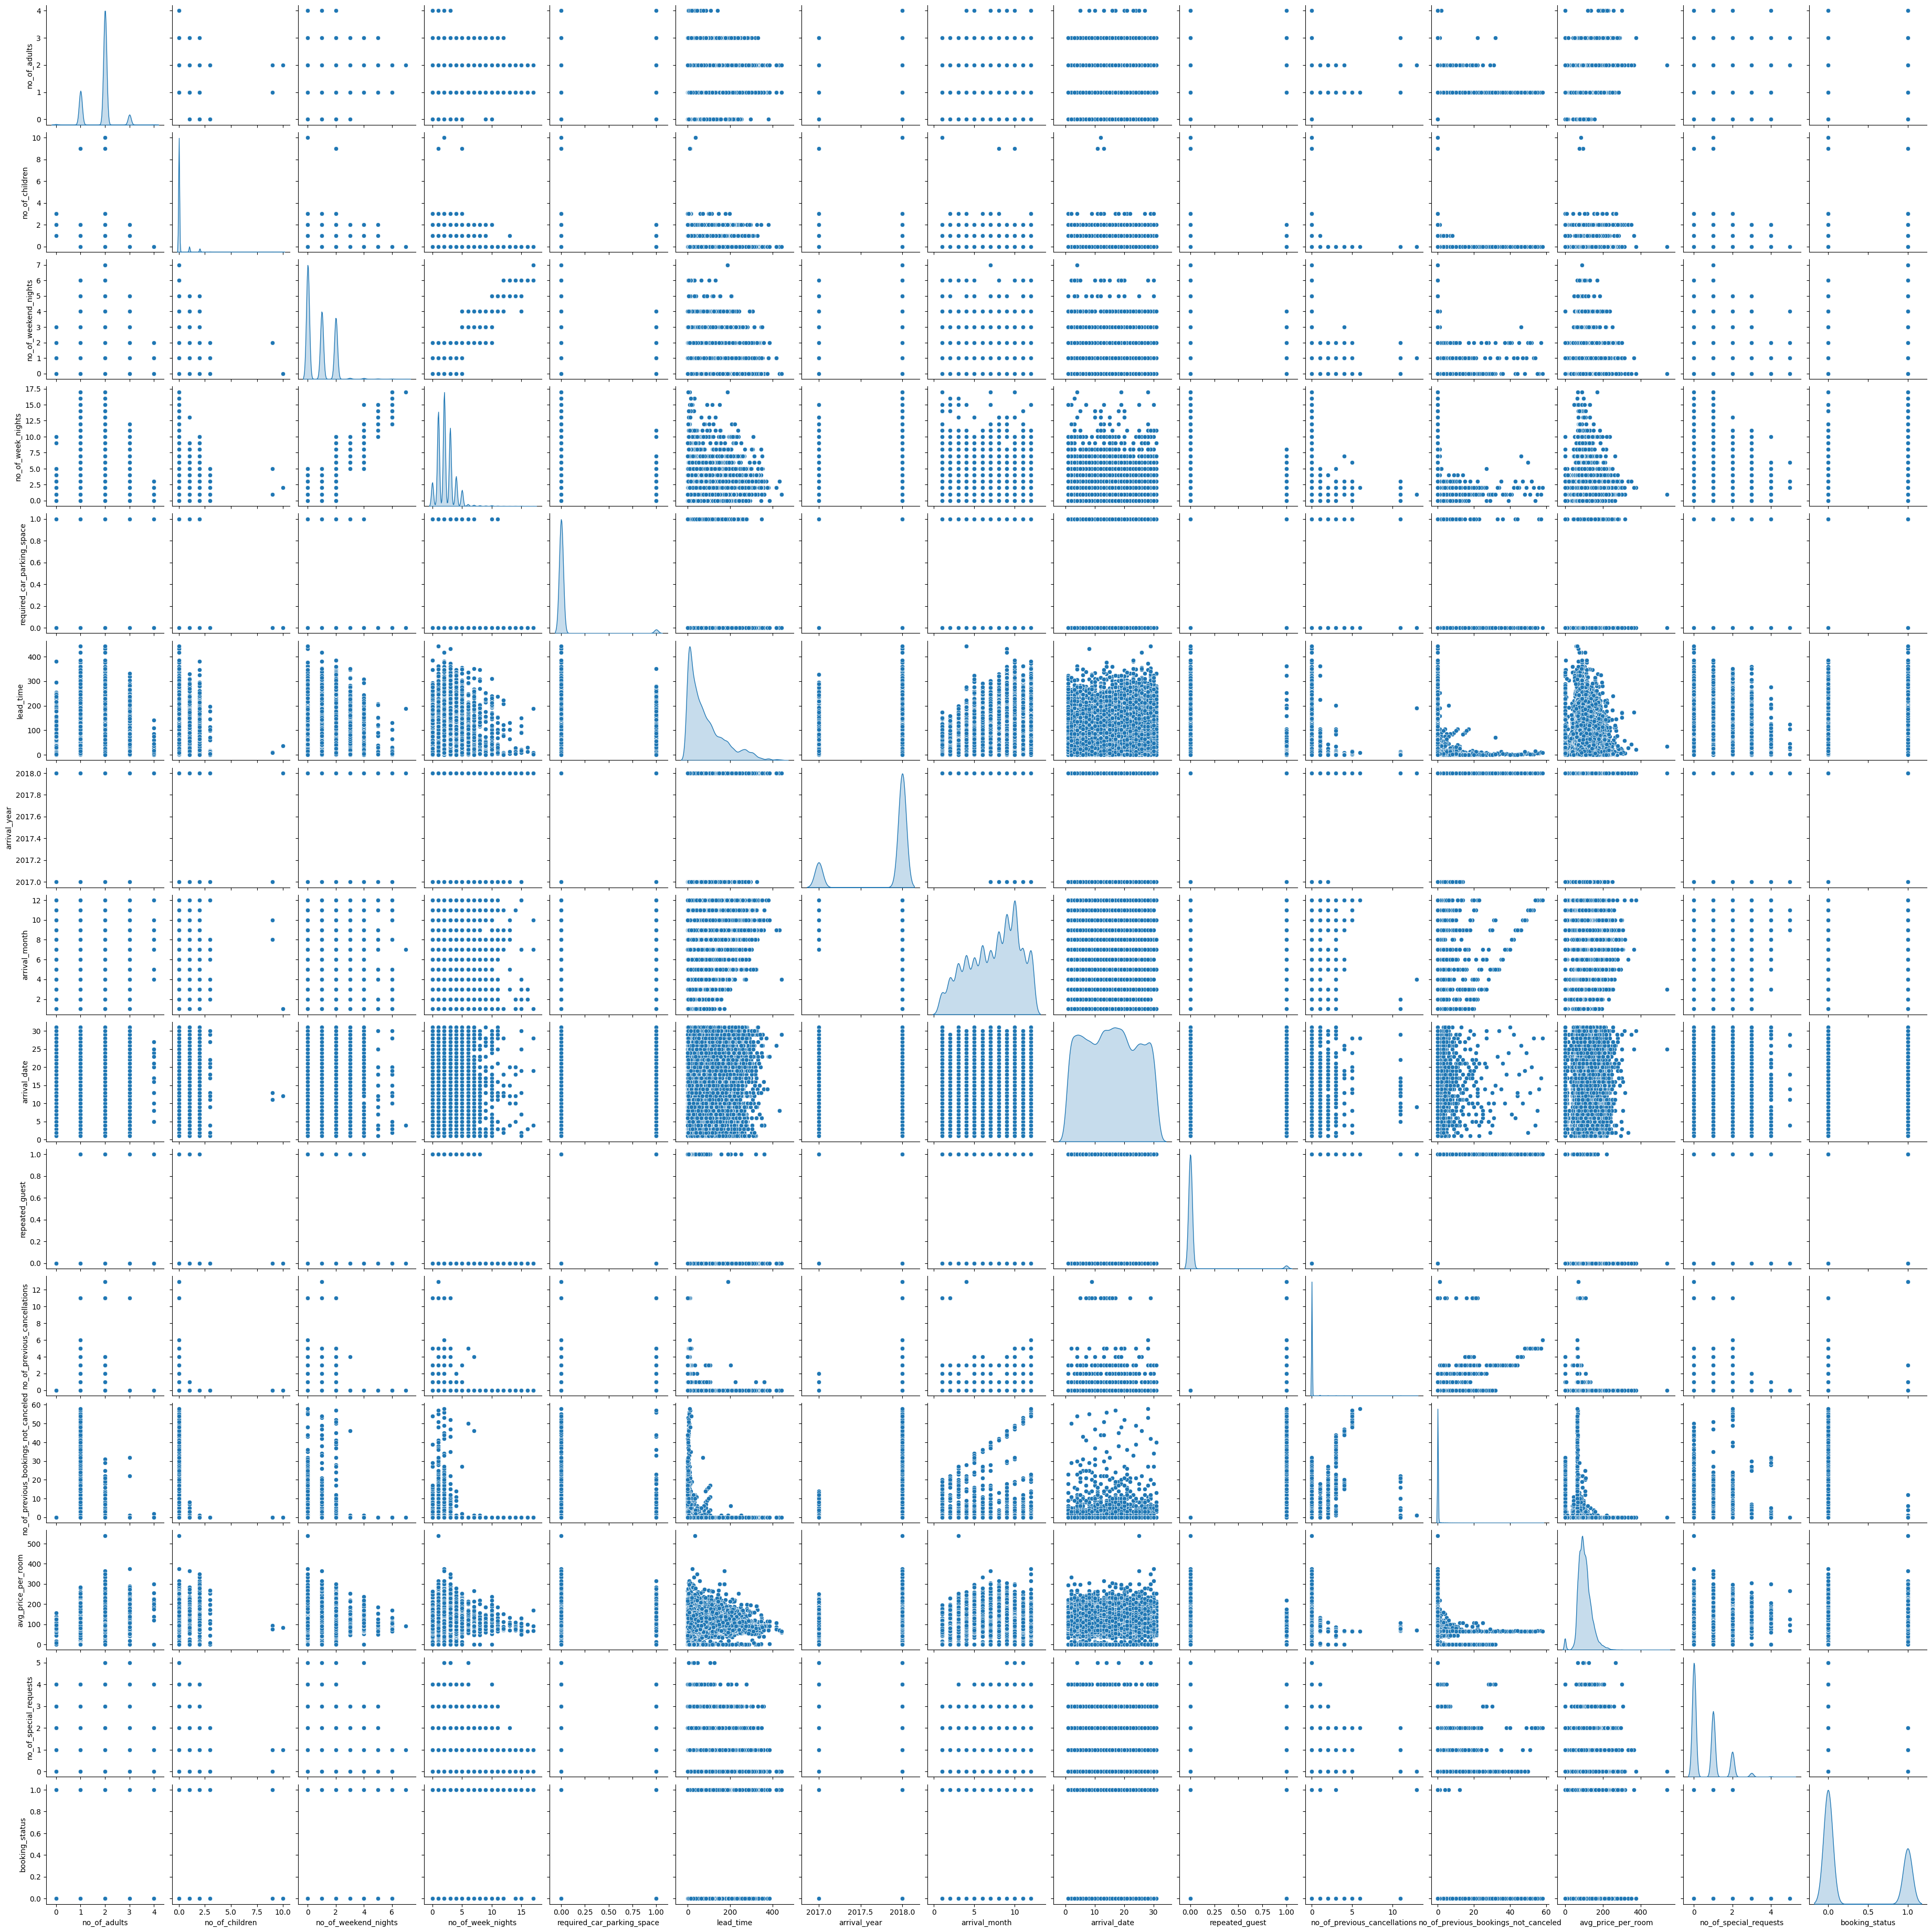

In [ ]:
# Now the pairplot with the KDE instead of the histogram
sns.pairplot(numerical, diag_kind="kde")

- Most variables do not follow a specific pattern. Only number of week and weekend nights have a slight linear relationship.

#### 1. What are the busiest months in the hotel?

In [ ]:
# First we get the count of actual bookings per month, excluding the canceled bookings
month_data = df.groupby(['arrival_month'])['booking_status'].count()
print(month_data)

arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: booking_status, dtype: int64


In [ ]:
# new we convert it into a dataframe
month_datas = pd.DataFrame({"Month": list(month_data.index), "Guests": list(month_data.values)})
month_datas

Month  Guests
0       1    1014
1       2    1704
2       3    2358
3       4    2736
4       5    2598
5       6    3203
6       7    2920
7       8    3813
8       9    4611
9      10    5317
10     11    2980
11     12    3021

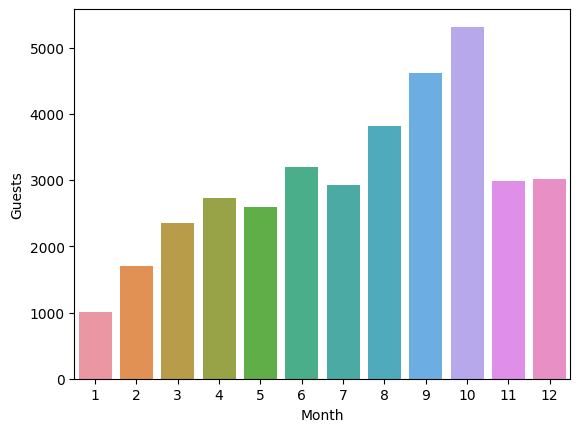

In [ ]:
# now the plot
sns.barplot(data=month_datas, x='Month', y='Guests')
plt.show()

- The busiests months are August, September, and October.

#### 2. Which market segment do most of the guests come from?

<Axes: xlabel='segment', ylabel='guests'>

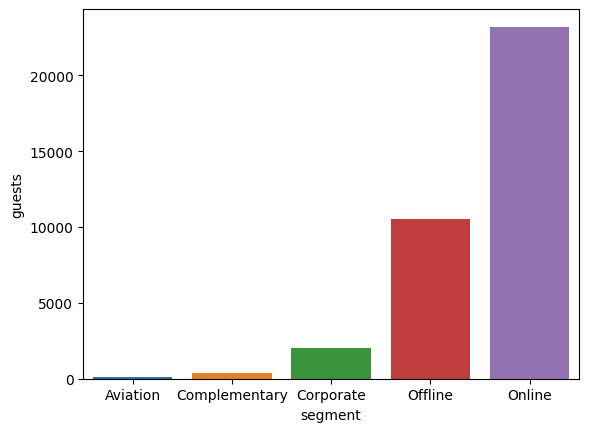

In [ ]:
market_data = df.groupby(['market_segment_type'])['booking_status'].count()
market_datas = pd.DataFrame({'segment':market_data.index, 'guests':market_data.values})
sns.barplot(data=market_datas, x='segment', y='guests')

- Online and Offline are the most popular market segments.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

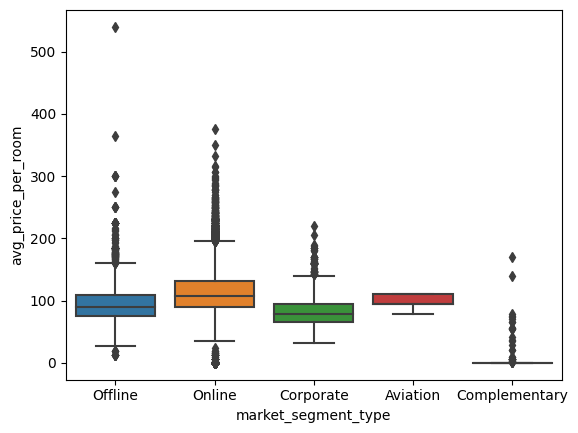

In [ ]:
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room')

- Most of the segments have avg room prices ~100 euros, there's not much variance. However, Offline and Online segments do have much more upper outliers compared to the rest, and Complementary has the lowest avg prices.

#### 4. What percentage of bookings are canceled?

In [ ]:
df['booking_status'].value_counts(1)

0   0.67236
1   0.32764
Name: booking_status, dtype: float64

~32.7% of the bookings were canceled.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?


In [ ]:
repeating_cancelers = df.groupby(['repeated_guest'])['booking_status'].value_counts(1)
repeating_cancelers

repeated_guest  booking_status
0               0                0.66420
                1                0.33580
1               0                0.98280
                1                0.01720
Name: booking_status, dtype: float64

- 1.7% of repeating guests canceled.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
special_requirements = df.groupby(['no_of_special_requests'])['booking_status'].value_counts(1)
special_requirements

no_of_special_requests  booking_status
0                       0                0.56793
                        1                0.43207
1                       0                0.76233
                        1                0.23767
2                       0                0.85403
                        1                0.14597
3                       0                1.00000
4                       0                1.00000
5                       0                1.00000
Name: booking_status, dtype: float64

- Clients that made 3, 4, and 5 requests did not cancel.
- Clients that made 0, 1, and 2 canceled 43%, 23%, and 14%.
- Overall, the more request they make, less chances of canceling.

#### avg price per room vs booking status

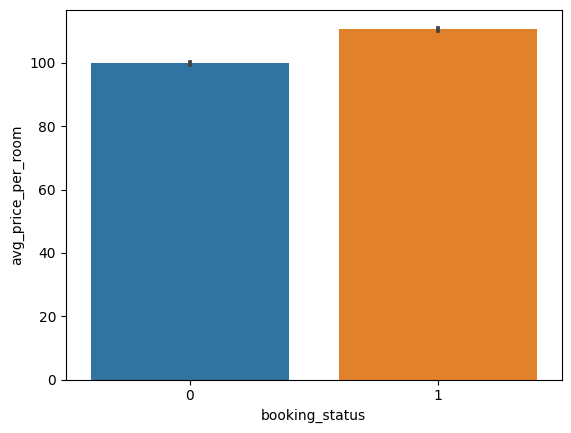

In [ ]:
sns.barplot(data=df, x='booking_status', y='avg_price_per_room')
plt.show()

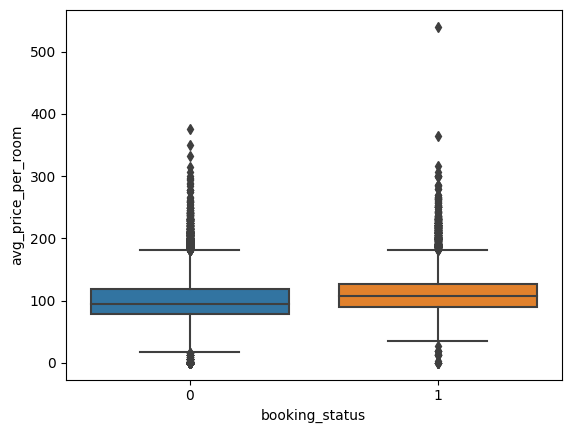

In [ ]:
sns.boxplot(data=df, x='booking_status', y='avg_price_per_room')
plt.show()

- Canceled bookings have a slight higher average price per room.

#### lead time vs booking status

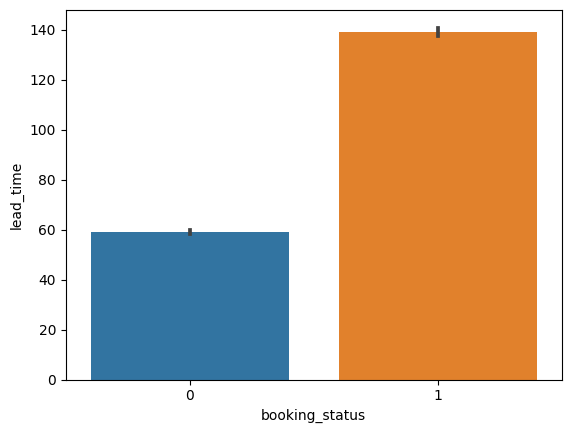

In [ ]:
sns.barplot(data=df, x='booking_status', y='lead_time')
plt.show()

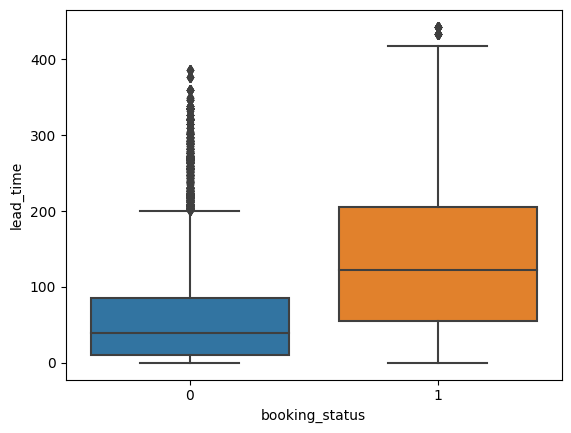

In [ ]:
sns.boxplot(data=df, x='booking_status', y='lead_time')
plt.show()

- Canceled bookings have a higher average lead time, ~140 days, compared to non-canceled bookings which is ~60 days.
- Bookings with high lead times can also be non-canceled, as shown by the amount of outliers.

#### type of meal plan vs booking status

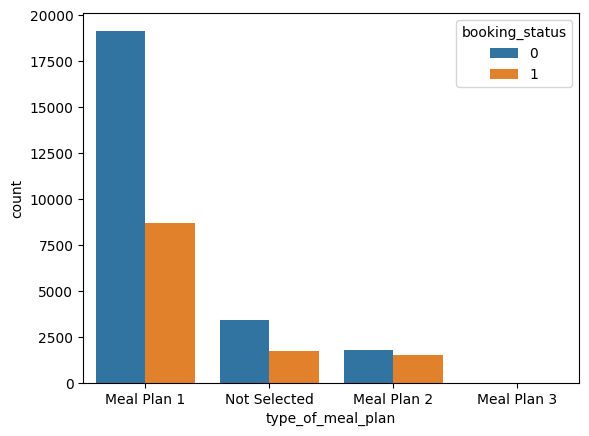

In [ ]:
sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status')
plt.show()

- Based on proportions, meal plan 1 gets canceled less than the other meal plans. It's also the most popular.

#### required parking space vs booking status

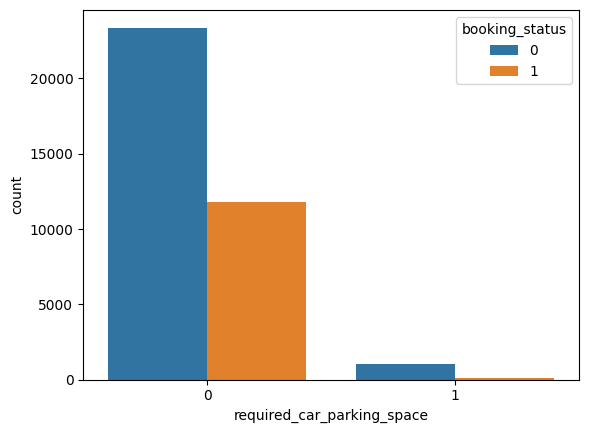

In [ ]:
sns.countplot(data=df, x='required_car_parking_space', hue='booking_status')
plt.show()

- When guests do not require a parking space, around half of them end up canceling, but when they do require one, the amount that cancels is very low.

#### room type reserved vs booking staus

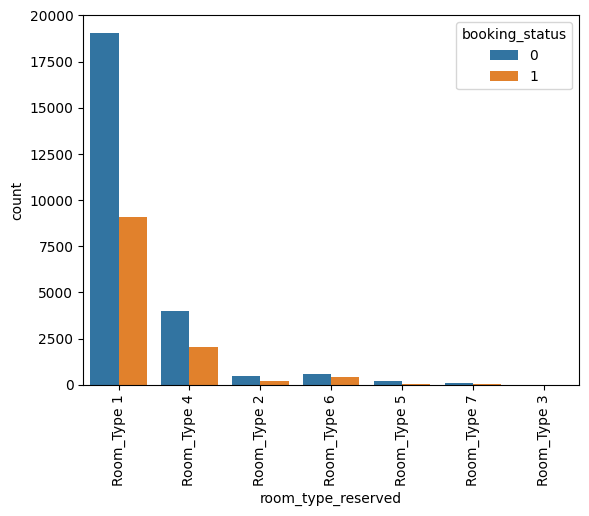

In [ ]:
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.xticks(rotation=90)
plt.show()

- When guests select room type 1, about 50% of them cancel. There's a similar proportion among the other rooms.

#### market segment vs avg room price

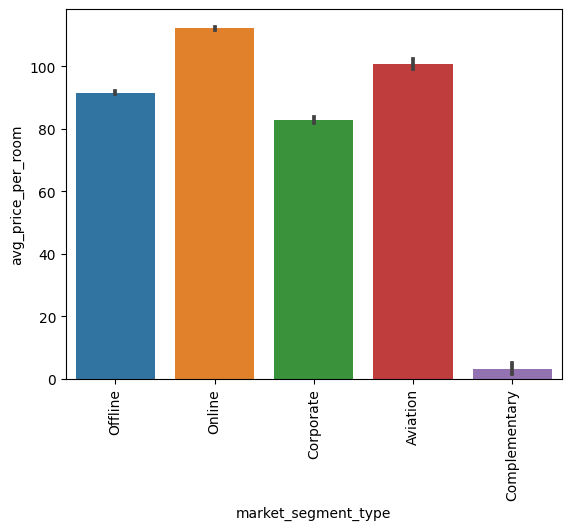

In [ ]:
sns.barplot(data=df, x='market_segment_type', y='avg_price_per_room')
plt.xticks(rotation=90)
plt.show()

- Most segments have a similar avg room price, but Online and Aviation have it slightly higher. Complementary has the lowest avg by far ~5 euros.

#### room type reserved vs avg room price

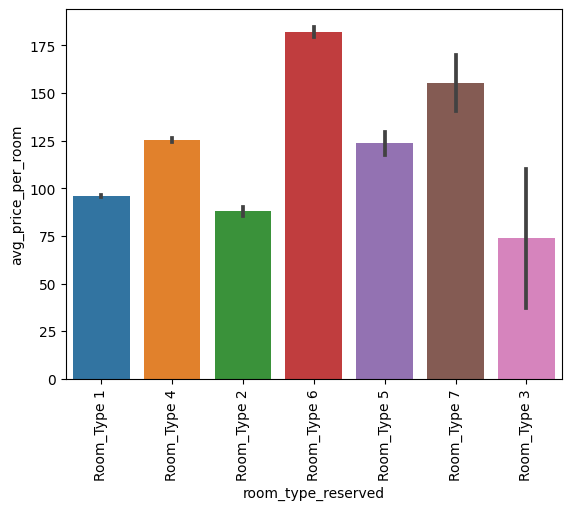

In [ ]:
sns.barplot(data=df, x='room_type_reserved', y='avg_price_per_room')
plt.xticks(rotation=90)
plt.show()

- Rooms type 6 and 7 have the highest avg price. Type 1, 2, and 3 have the lowest.

#### type of meal plan vs avg room price

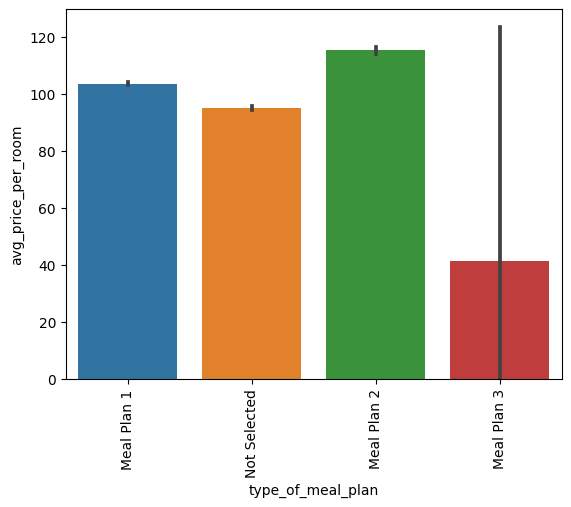

In [ ]:
sns.barplot(data=df, x='type_of_meal_plan', y='avg_price_per_room')
plt.xticks(rotation=90)
plt.show()

- Most meal plans have a similar avg room price ~100 euros. Meal plan 3 is the exception with an avg ~40 euros.

#### room type vs type of meal plan vs avg room price

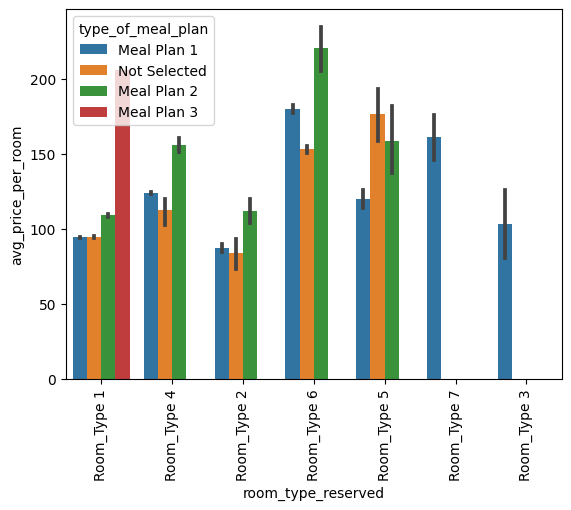

In [ ]:
sns.barplot(data=df, x='room_type_reserved', y='avg_price_per_room', hue='type_of_meal_plan')
plt.xticks(rotation=90)
plt.show()

- room type 1 with meal plan 3 has the highest avg room price. On that room, plans 1, 2, and not selected have a very similar avg price.
- Besides room type 1, no other rooms selected meal plan 3. For those rooms meal plan 2 has the highest avg room price, excluding room type 5, and type 7-3 which only have meal plan 1.

-

#### repeating guest vs type of meal plan

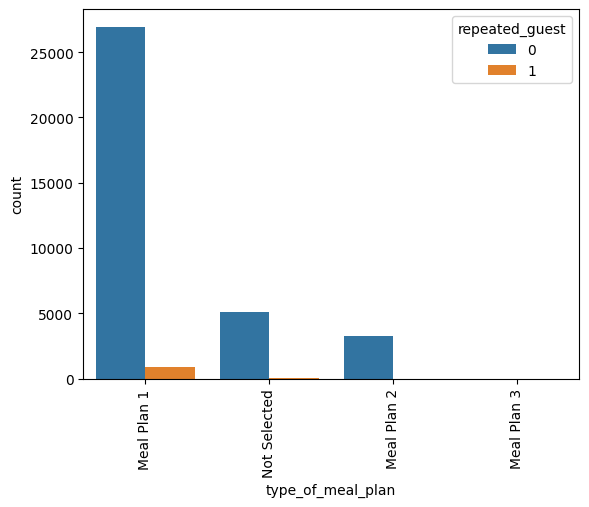

In [ ]:
sns.countplot(data=df, x='type_of_meal_plan', hue='repeated_guest')
plt.xticks(rotation=90)
plt.show()

- Out of the low amount of repeating guests, most of them prefer meal plan 1.

#### repeating guest vs room type

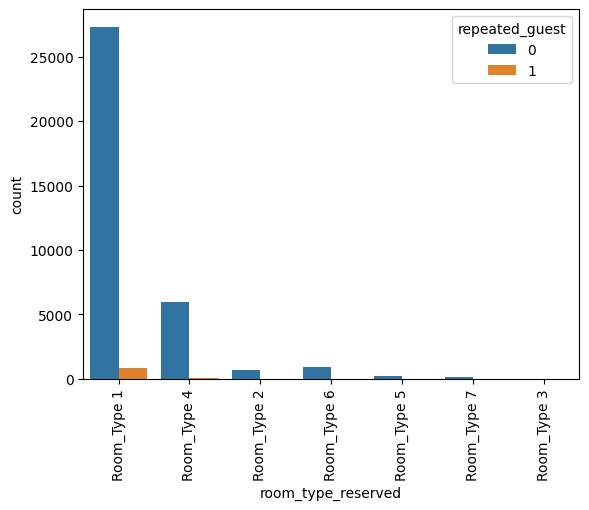

In [ ]:
sns.countplot(data=df, x='room_type_reserved', hue='repeated_guest')
plt.xticks(rotation=90)
plt.show()

- Out of the low amount of repeating guests, most of them prefer the room type 1.

## Data Preprocessing

### Missing Values

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values.

### Outliers

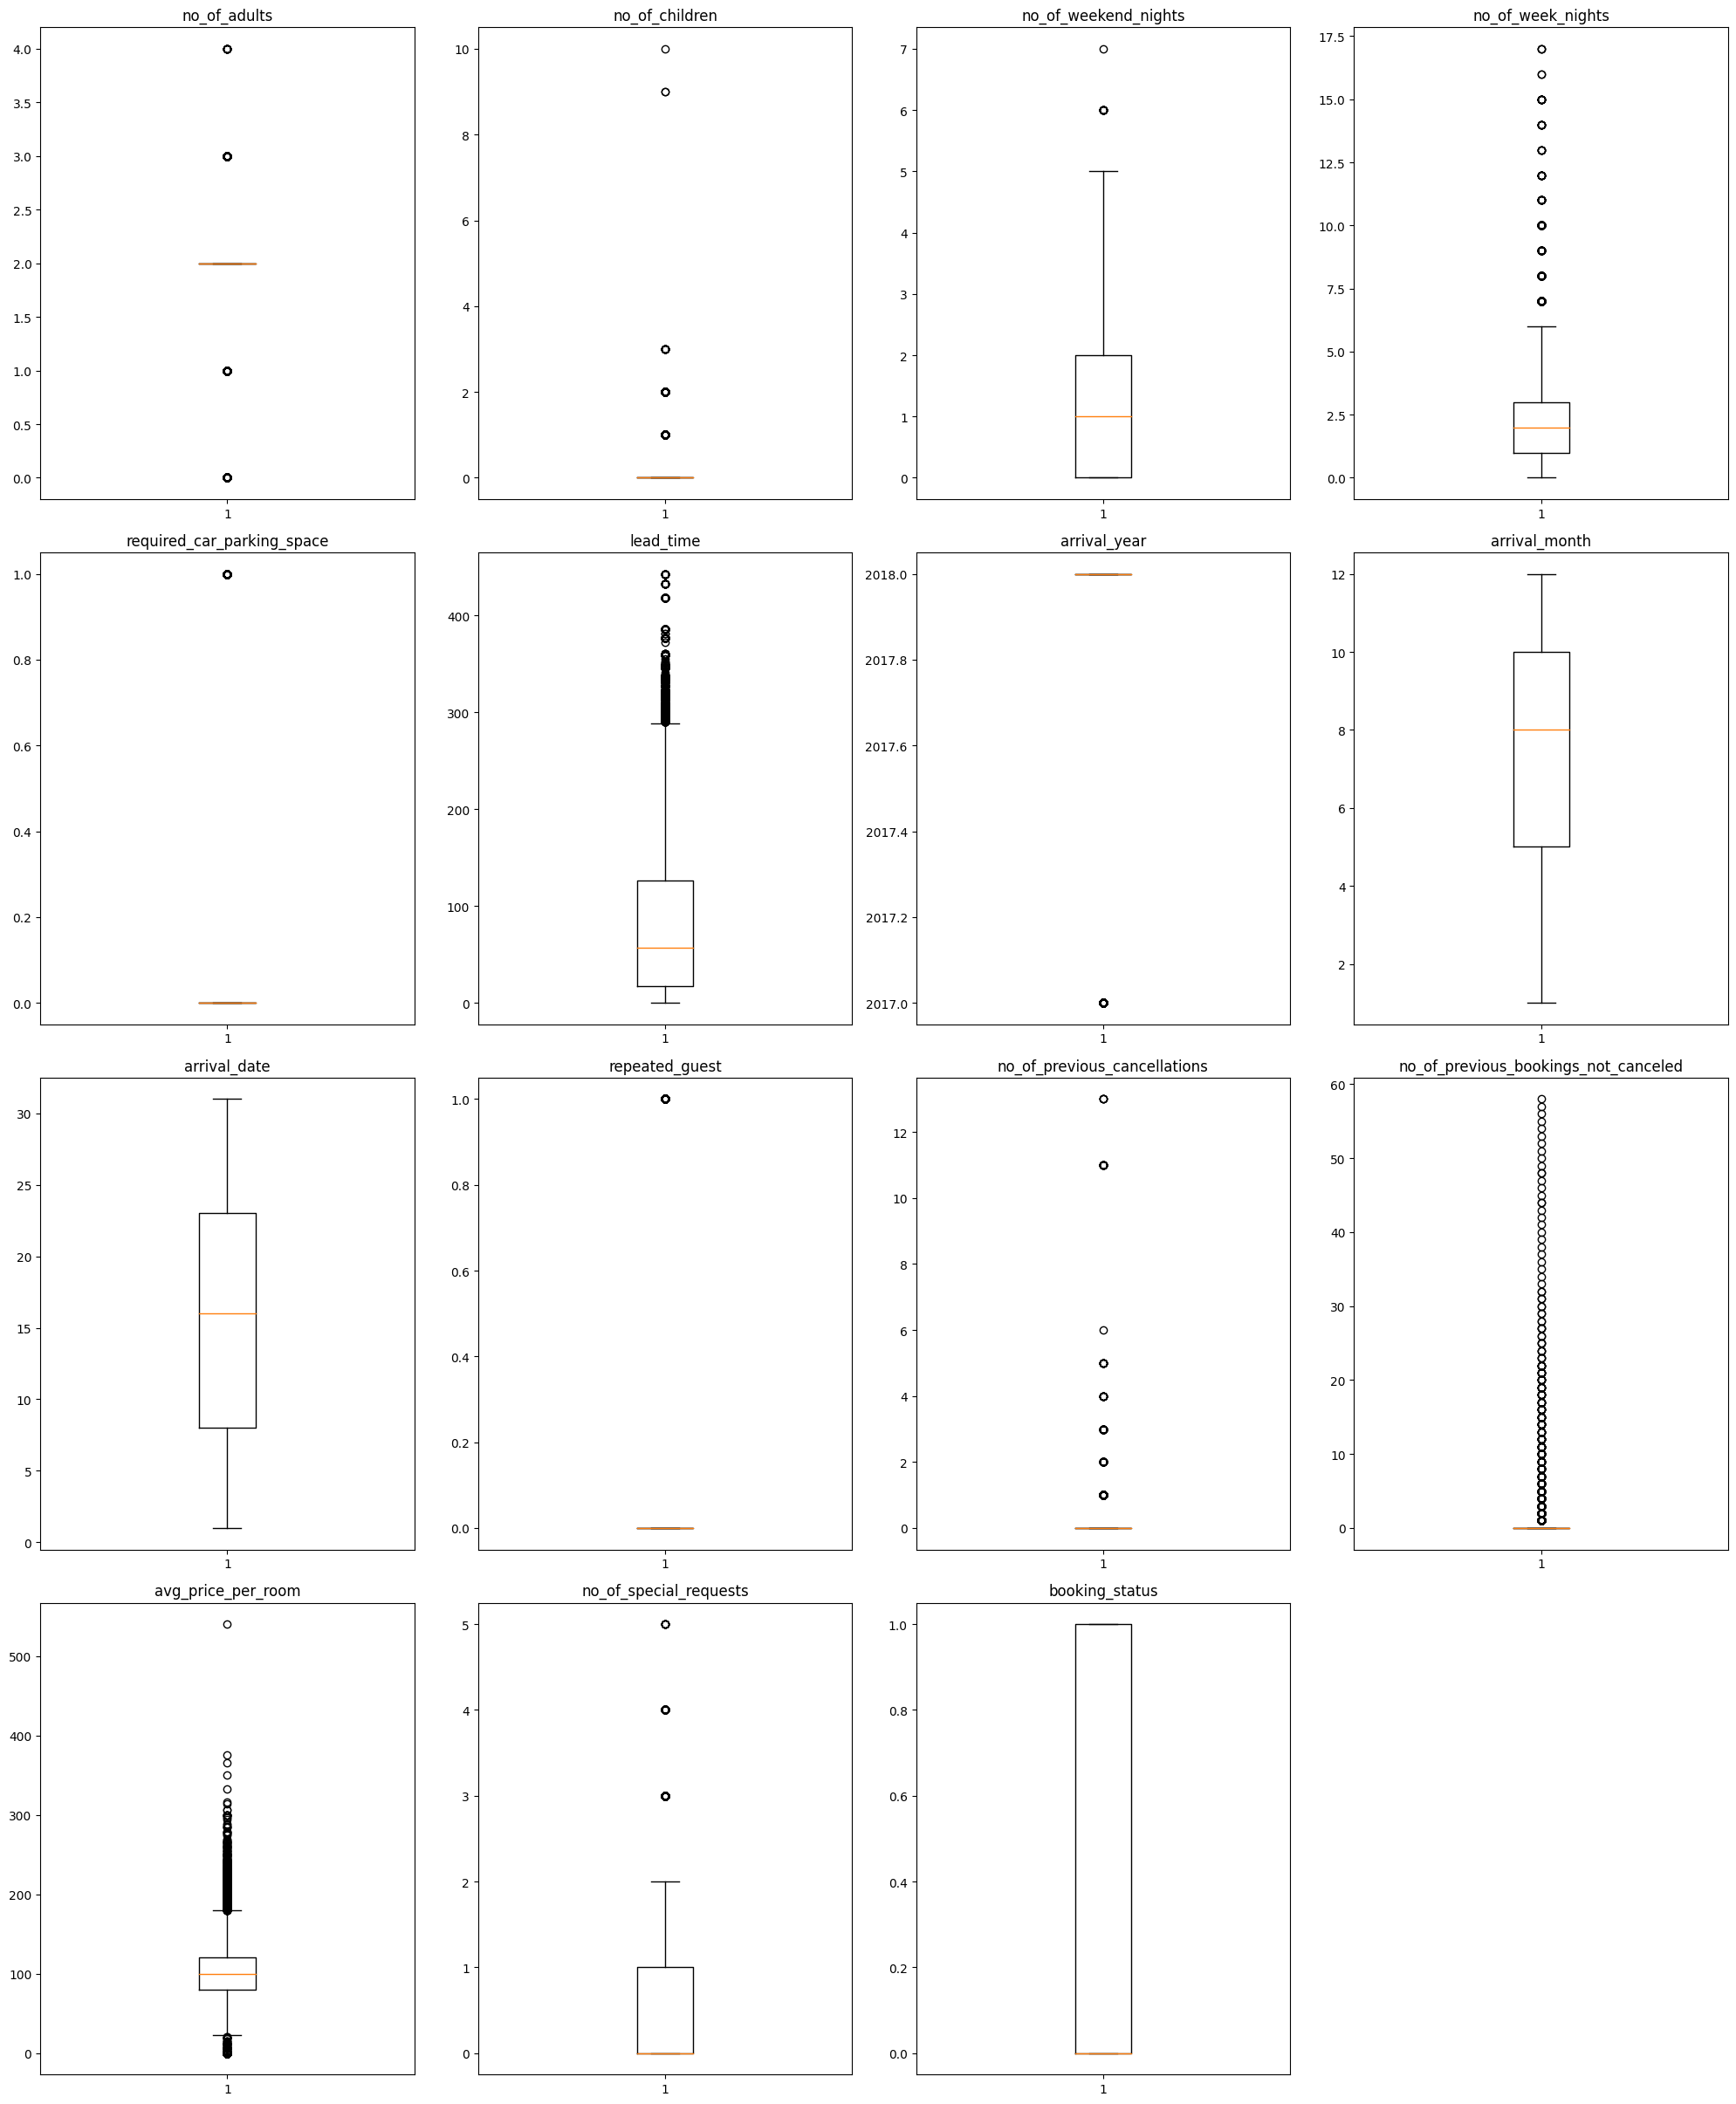

In [ ]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We already checked the outliers in the univariate analysis and none of them seem to be out of the ordinary or incorrect data. Also, I had some issues fitting the logistic regression model, and based on the FAQs page, not treating the outliers could help. For those reasons, we won't treat them.

## Building a Logistic Regression model

Let's check the distribution of booking status

In [ ]:
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [ ]:
df['booking_status'].value_counts(1)

0   0.67236
1   0.32764
Name: booking_status, dtype: float64

We need to keep this proportion as much as possible in our training and test splits.

IMPORTANT: If we just predict all bookings as Not Canceled, we would be right 67% of the time. And if we predict all as Canceled, we would be right 32% of the time. That's the base metric we want to beat using the classification models.

### Data Split

In [ ]:
X = df.drop(['booking_status'], axis =1)
Y = df['booking_status']

# Add a constant
X = sm.add_constant(X)

# Create Dummy
X = pd.get_dummies(X, drop_first = True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.30, random_state =1, stratify=Y
)

Let's see the shapes of the splits and if the proportion of y values is the same.

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


We kept the same proportions, let's proceed.

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIFs: \n\n{}\n".format(vif_series))

VIFs: 

const                                  39595445.81095
no_of_adults                                  1.34506
no_of_children                                2.00721
no_of_weekend_nights                          1.06725
no_of_week_nights                             1.09437
required_car_parking_space                    1.03494
lead_time                                     1.40192
arrival_year                                  1.43326
arrival_month                                 1.27740
arrival_date                                  1.00763
repeated_guest                                1.75019
no_of_previous_cancellations                  1.32201
no_of_previous_bookings_not_canceled          1.57086
avg_price_per_room                            2.03263
no_of_special_requests                        1.24723
type_of_meal_plan_Meal Plan 2                 1.26182
type_of_meal_plan_Meal Plan 3                 1.00796
type_of_meal_plan_Not Selected                1.27921
room_type_reserved_R

Only dummies have high VIF, so we're good to go.

### Fit first model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.3322
Time:                        05:13:11   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.9563    121.332     -7.310      0.000   -1124.762    -649.150
no_of_adults                             0.0333      

- Negative coefficient means that an increment in that variable, decreases the chances of cancelation. The other way around is with positive coefficients.
- We won't make interpretations yet since some variables have high p-values and we might drop them.

### Model performance evaluation

#### How the model makes wrong predictions:

- FP: The model predicts a booking will be canceled, when in fact it wasn't.
- FN: The model predicts a booking will not be canceled, when in fact it was canceled.

**Both cases of errors are very costly for the hotel;**
- FP: The hotel staff may try to sell the room to another customer, and end up with 2 customers looking for the same room and wasted resources.
- FN: The hotel staff doesn't do anything, but ends up with a canceled booking, and the necessity to spend resources finding a new customer and probably at a lower price compared to the average daily price.

In this case, both FP and FN have a very high cost, therefore we must reduce both.

***To do so, we'll use the F1 score.***

  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$


Now, let's write the functions to calculate the model performance and plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

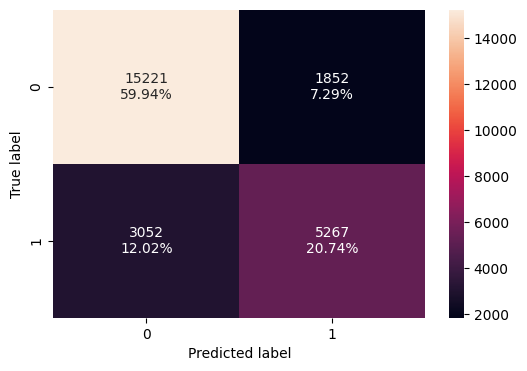

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
model_performance_classification_statsmodels(lg, X_train, y_train)

Accuracy  Recall  Precision      F1
0   0.80687 0.63313    0.73985 0.68234

- F1 is .68 which could be better.
- FP are 7.29%, and FN are 12.02%. Overall this is not a bad number, but we'll aim to decrease it.

### P-values

To drop high p-value variables we'll use a loop:

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


When the loop finishes, in the object cols, there will be all the columns that the loop didn't drop, aka the variables with p-value < 0.05.

In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.3312
Time:                        05:13:14   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.8889    120.911     -7.194      0.000   -1106.870    -632.908
no_of_weekend_nights               0.1498      0.020      7.568      0.

Now all the variables have a p-value < 0.05.

### Coefficients to Odds

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.16163            1.03686   
Change_odd% -100.00000              16.16282            3.68572   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.19893    1.01601       1.53690   
Change_odd%                   -80.10671    1.60144      53.69000   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95202         0.04620                       1.33534   
Change_odd%       -4.79758       -95.37970                      33.53397   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01923                 0.22639   
Change_odd%             1.92270               -77.36112   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.18160                         1.23349   
Change_odd%                       18.15955                        23.34870   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.68837                         0.76503   
Change_odd%                       -31.16329                       -23.49673   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50261                         0.47622   
Change_odd%                       -49.73868                       -52.37831   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.26847                        0.41852   
Change_odd%                       -73.15301                      -58.14827   

             market_segment_type_Offline  
Odds                             0.16991  
Change_odd%                    -83.00891

Observations:

Negative effect:

- required_car_parking_space: Holding all other features constant, a 1 unit change in the required parking space will decrease the odds of canceling by ~0.19 times, or decrease the odds of canceling by ~80%. This is a very good variable.

- repeated_guest: Holding all other features constant, being a repeated guest decreases the odds of canceling by ~0.04 times, or decreases the odds of canceling by ~95%. This is a very good variable too.

- no_of_special_requests:  Holding all other features constant, a 1 unit change in the number of special requests will decrease the odds of canceling by ~0.22 times, or decrease the odds of canceling by ~77%. This is a very good variable.

- market-segment_type_corporate & Offline: Compared to Online, Complementary, and Aviation segments (that were dropped), a booking made in the corporate segment will have ~0.41 times fewer odds of canceling, or a decrease of canceling odds by ~58%. Same case with the online segment, that decreases ~0.16 times, or ~83%.** An interpretation would be that corporate bookings are for work, which normally are much more planned, serious, and compromising compared to simple vacations. Offline bookings require much more effort to be made compared to for example online bookings, therefore people are less likely to cancel since they made a greater effort.

- room_type_reserved: Compared to rooms type 1 and 3, that were dropped, if the booking requested room type 2, the odds of canceling decrease by ~0.68 times, or ~31%. If it's room type 4, the odds decrease by ~0.76 times, or ~23%. If it's room type 5, the odds decrease by ~0.5 times, or ~49%. If it's room type 6, the odds decrease by ~0.47 times, or ~52%. If it's room type 7, the odds decrease by ~0.26 times, or ~73%.

Positive effect:

* with all other features held constant;

- nights: the number of weeknights has a very small effect on cancelation odds, around a ~3% increase. On the other hand, if the number of weekend nights increases by 1 unit, the chances of canceling increases by 0.16 times or ~16%.

- lead time: has a very small effect, around a ~1.6% increase in canceling odds. Similar to the average price per room, ~1.92%, and arrival month ~4.7%.

- arrival_year: A 1 unit increment in the arrival year increases the odds of canceling by ~0.53 times, or ~53%.

- no_of_previous_cancellations: A 1 unit increment in the number of previous cancelations increases the odds of canceling by ~0.33 times, or ~33%.**

- type_of_meal_plan: Compared to meal plan 1 and 3, that were dropped, if the booking has the meal type 2, the odds of canceling increase by ~0.18 times, or ~18%. if a meal plan is not selected, the odds increase by ~0.23 times, or ~23%.


### Performance Test

Training Set:

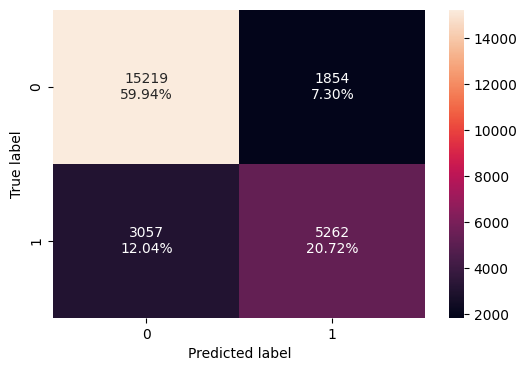

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_perf_train = model_performance_classification_statsmodels(lg1, X_train1, y_train)
print(log_perf_train)

   Accuracy  Recall  Precision      F1
0   0.80659 0.63253    0.73946 0.68183


Test set:

In [ ]:
# We'll use the columns from X_test 1 in the X test set

X_test1 = X_test[list(X_train1.columns)]

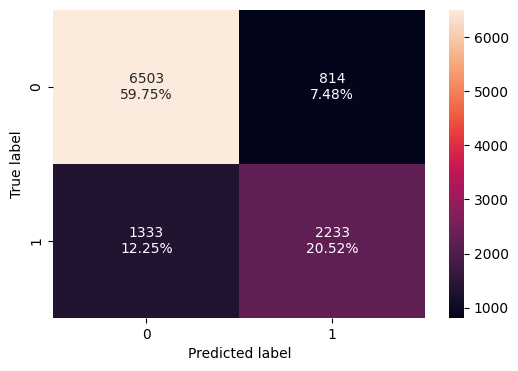

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_perf_test = model_performance_classification_statsmodels(lg1, X_test1, y_test)
print(log_perf_test)

   Accuracy  Recall  Precision      F1
0   0.80272 0.62619    0.73285 0.67534


Overall performance on the test set was a bit lower, meaning we did not overfit. That's good. Besides that, we could work to increase F1.

### Improvement

#### ROC & AUC

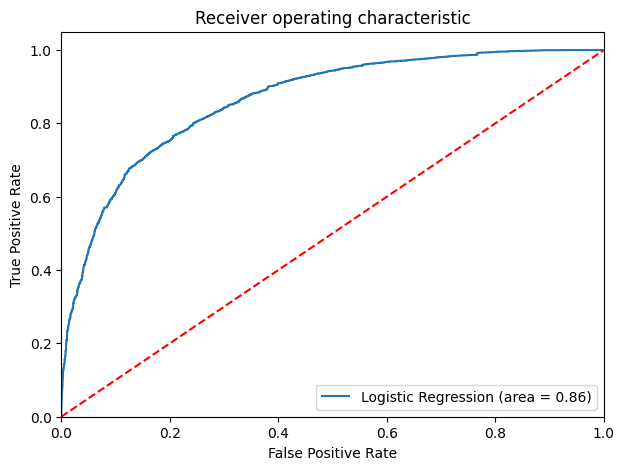

In [ ]:
auc_train1 = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % auc_train1)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

AUC is 0.86, which is actually not bad. Let's see if we can increase it.

In [ ]:
# Let's find the threshold
# We want the point with the highest TPR and lowest FPR

fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3329571917391589


The optimal threshold is 0.33. So we're 'lowering' the bar for bookings to be predicted as canceled.

Let's see the training performance:

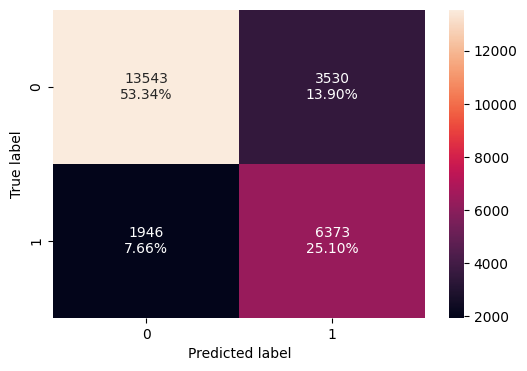

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold = optimal_threshold_auc_roc)

In [ ]:
log_perf_train_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold = optimal_threshold_auc_roc)
print(log_perf_train_auc_roc)

   Accuracy  Recall  Precision      F1
0   0.78434 0.76608    0.64354 0.69948


- FP and FN pretty much inverted.
- Accuracy dropped, recall increased, precision decreased, and F1 stayed pretty much the same.

Let's see performance on the test set:

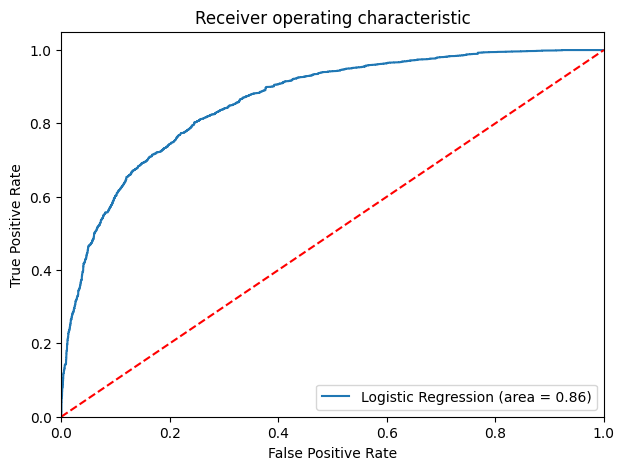

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

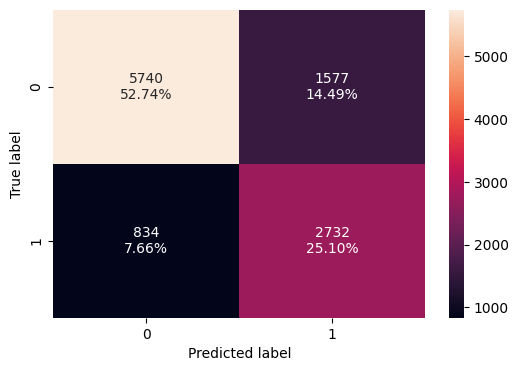

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_auc_roc)

In [ ]:
log_perf_test_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_auc_roc)
print(log_perf_test_auc_roc)

   Accuracy  Recall  Precision      F1
0   0.77846 0.76612    0.63402 0.69384


Very similar to training performance.

#### Precision-Recall

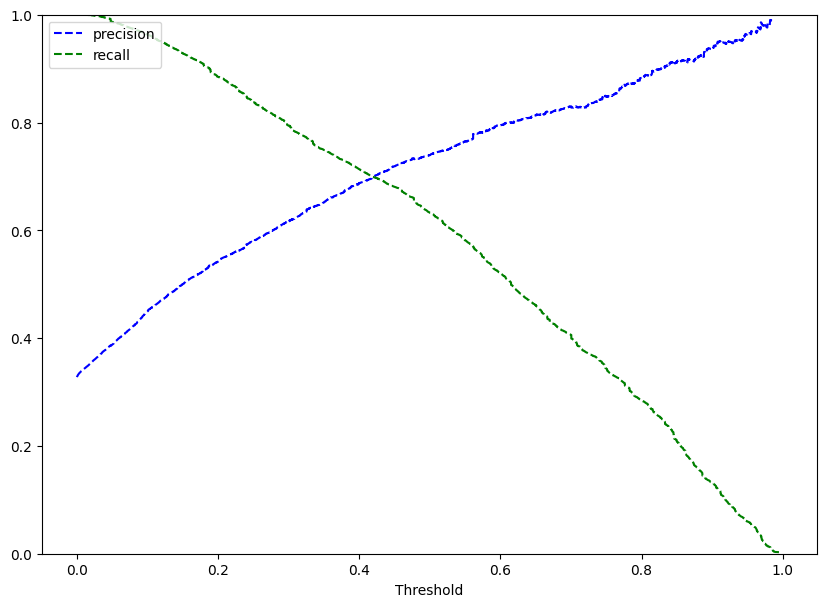

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

The threshold is ~0.42. Let's test it.

Training set performance:

In [ ]:
# optimal threshold
optimal_threshold_curve = 0.42

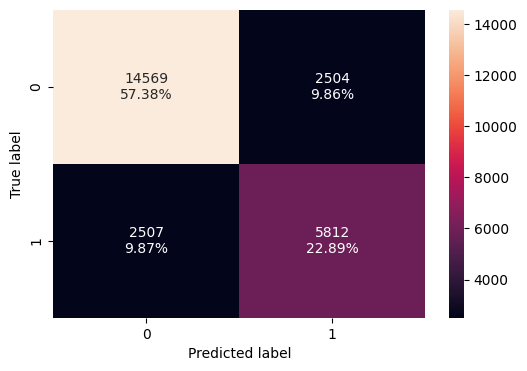

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_perf_train_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print(log_perf_train_threshold_curve)

   Accuracy  Recall  Precision      F1
0   0.80265 0.69864    0.69889 0.69877


- Accuracy increased a bit, recall and precision are almost equal, and F1 increased a bit.

Test set performance:

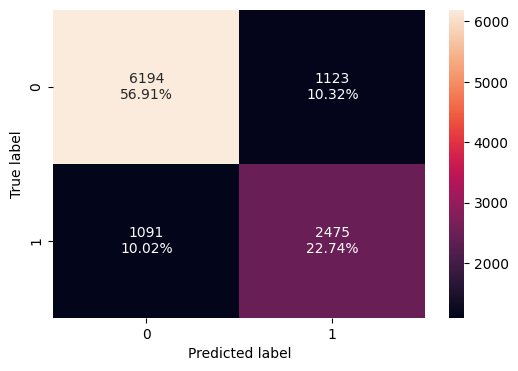

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_perf_test_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)
print(log_perf_test_threshold_curve)

   Accuracy  Recall  Precision      F1
0   0.79656 0.69405    0.68788 0.69095


### Final Model Comparison & Summary

Train Performance Comparison

In [ ]:
models_train_comp_df = pd.concat(
    [
        log_perf_train.T,
        log_perf_train_auc_roc.T,
        log_perf_train_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80659   
Recall                                         0.63253   
Precision                                      0.73946   
F1                                             0.68183   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.78434   
Recall                                0.76608   
Precision                             0.64354   
F1                                    0.69948   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80265  
Recall                                0.69864  
Precision                             0.69889  
F1                                    0.69877

Test Performance Comparison

In [ ]:
models_test_comp_df = pd.concat(
    [
        log_perf_test.T,
        log_perf_test_auc_roc.T,
        log_perf_test_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",

]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80272   
Recall                                         0.62619   
Precision                                      0.73285   
F1                                             0.67534   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.77846   
Recall                                0.76612   
Precision                             0.63402   
F1                                    0.69384   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79656  
Recall                                0.69405  
Precision                             0.68788  
F1                                    0.69095

Final Observations:

- Overall performance is midly lower on test compared to training, meaning we don't have overfitting or underfitting problems.
- Our initial objective was optimizing for F1-score, since both FP and FN negatively affected the hotel's finances and efficiencies. With that in mind, both thresholds .33 and .42 give the highest F1-score and should be used.
- The model with .42 threshold has the best overall performance, with high accuracy, recall, precision, and F1.
- If the hotel prefers to maximize TP and minimize FN, then the .33 threshold is the best option. In this case, since the threshold is lower, more bookings would be predicted as Canceled. There's a higher chance to catch the true cancelers (TP), have less predictions of Non-cancelers that actually canceled (FN), at the expense of having more predictions of canceled bookings that won't be actually canceled (FP).

## Building a Decision Tree model

### New Data Split

In [ ]:
x = df.drop(['booking_status'], axis=1)
y = df['booking_status']

x = pd.get_dummies(x, drop_first= True)

x.shape

(36275, 27)

In [ ]:
# Let's compare to X from the log regression
X.shape

(36275, 28)

x has 1 column less than X, since here we don't need a constant.

Now, I won't use the same names for train and tests sets. I'll add a 't' at the end to differentiate them from the log regression sets.

In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train_t.shape)
print("Shape of test set : ", X_test_t.shape)
print("Percentage of classes in training set:")
print(y_train_t.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_t.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


The proportions of training and test sets are the same compared to log regression. This will ensure we can compare both models.

As we did with log regression, 32%  will be our base performance metric; if we predict all bookings to be canceled, we would be right 32% of the time.

### First decision tree model

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train_t, y_train_t)

DecisionTreeClassifier(random_state=1)

How the model makes wrong predictions:

- FP: The model predicts a booking will be canceled, when in fact it wasn't.
- FN: The model predicts a booking will not be canceled, when in fact it was canceled.

**Both cases of errors are very costly for the hotel;**
- FP: The hotel staff may try to sell the room to another customer, and end up with 2 customers looking for the same room and wasted resources.
- FN: The hotel staff doesn't do anything, but ends up with a canceled booking, and the necessity to spend resources finding a new customer and probably at a lower price compared to the average daily price.

In this case, both FP and FN have a very high cost, therefore we must reduce both.

***To do so, we'll use the F1 score.***

  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

### Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Performance evaluation

In [ ]:
decision_tree_perf_train_orig = model_performance_classification_sklearn(
    model0, X_train_t, y_train_t
)
decision_tree_perf_train_orig

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

In [ ]:
decision_tree_perf_test_orig = model_performance_classification_sklearn(
    model0, X_test_t, y_test_t
)
decision_tree_perf_test_orig

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

- The difference in accuracy between training and testing is not that big, so the model managed to do a pretty good job.
- F1 in testing is 80% which is good, better than the log model.

Let's see the confusion matrix:

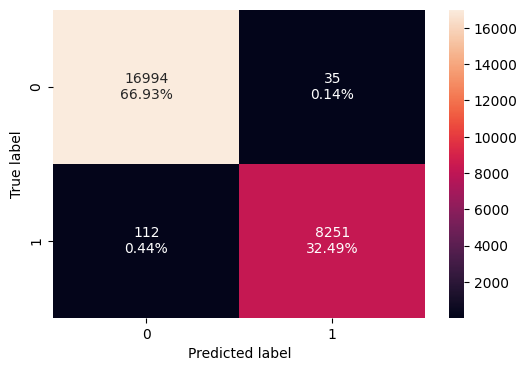

In [ ]:
confusion_matrix_sklearn(model0, X_train_t, y_train_t)

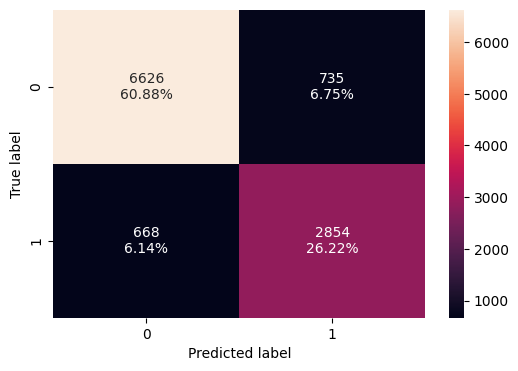

In [ ]:
confusion_matrix_sklearn(model0, X_test_t, y_test_t)

- The model shows overfitting, but the FP and FN are at a good rate in the test performance. We'll try to optimize both.
- We won't visualize the tree since it's too large.

Let's see the important features:

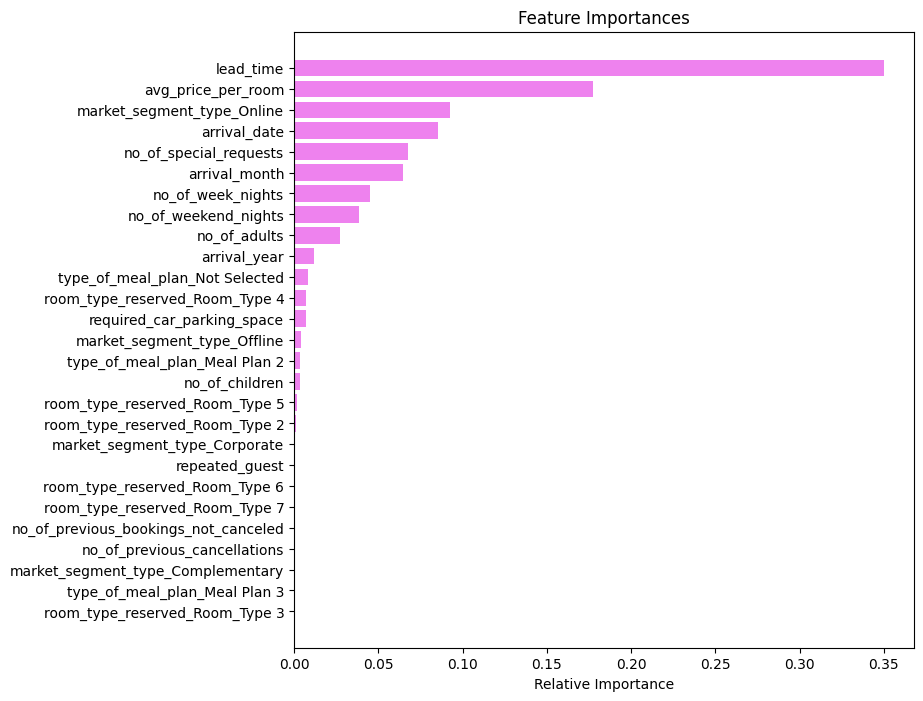

In [ ]:
feature_names = list(X_train_t.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In order, we see lead time, avg pricer per room, online market segment, arrival date, number of special requests, and so on.

### Pre-Pruning

In [ ]:
# Grid Search to get the best hyperparameters
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations; we'll use F1
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_t, y_train_t)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_t, y_train_t)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

- The pre-pruned tree has a max depth of 6, max number of leaf nodes of 50, and a minimum of samples to split of 10. It also has balanced class weight.

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train_t, y_train_t
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test_t, y_test_t
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

- F1, recall, and precision actually decreased in the testing set compared to the original tree.

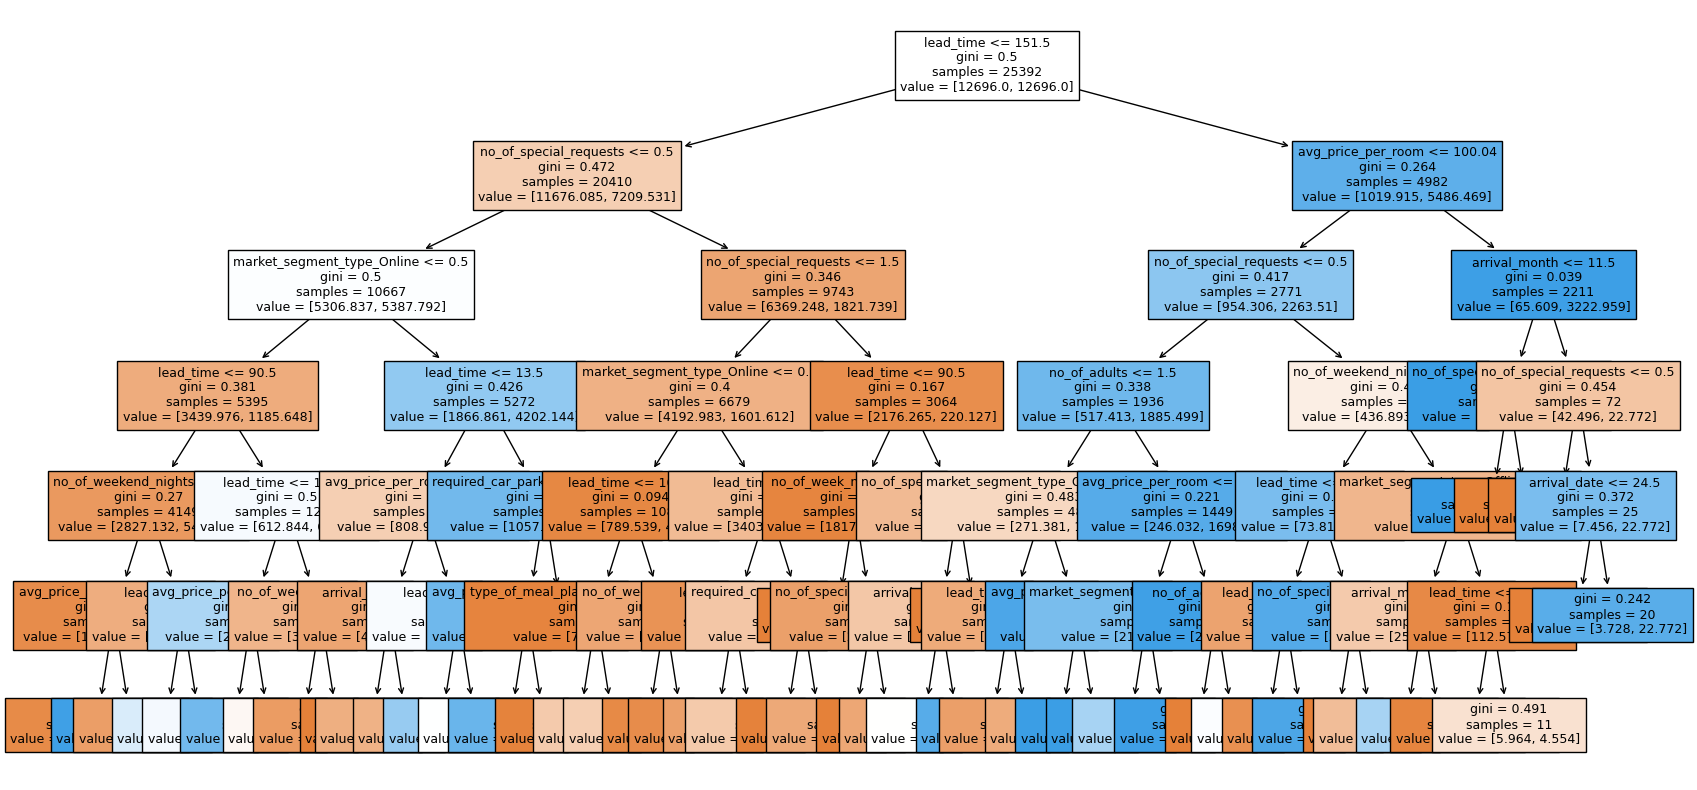

In [ ]:
# Let's plot the tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text version
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

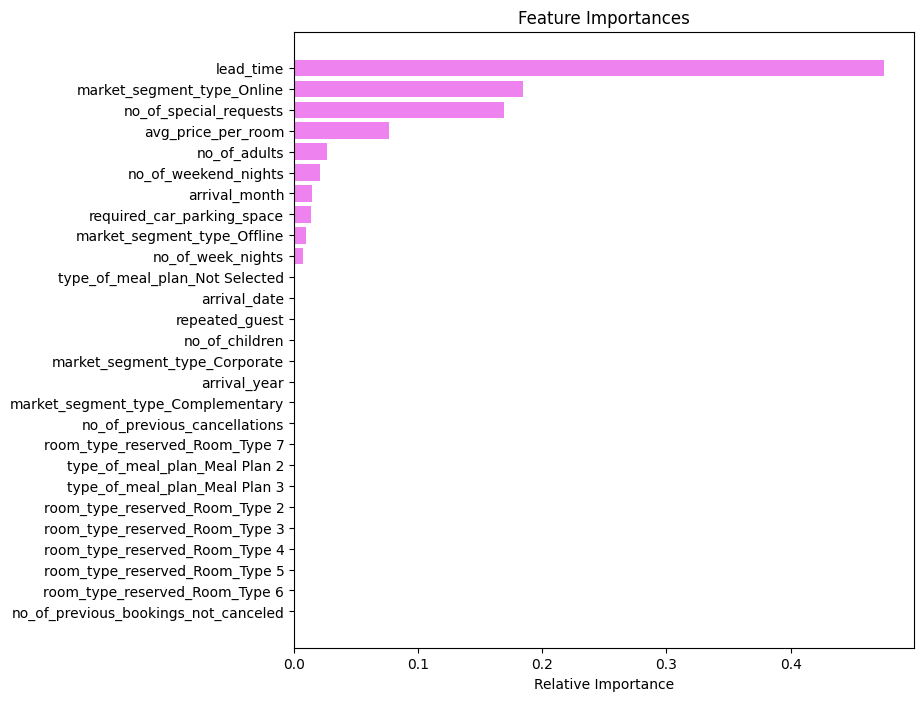

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Important features stayed pretty much the same.
- The pruned tree could be still considered large, even though it shows no signs of overfitting.

### Post Pruning

Here we want to use the cost complexity parameter alpha to prune the tree, from the most complex to the best performing. As alpha increases, we tend to reduce overfitting, but also increase impurity. The objective is finding the balance by removing the nodes that contribute the less to the model; have the lowest alpha.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train_t, y_train_t)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1837     0.00890     0.32806
1838     0.00980     0.33786
1839     0.01272     0.35058
1840     0.03412     0.41882
1841     0.08118     0.50000

[1842 rows x 2 columns]

These are all the alphas of all the pruned tree variations.

Now let's plot the alphas vs the impurity

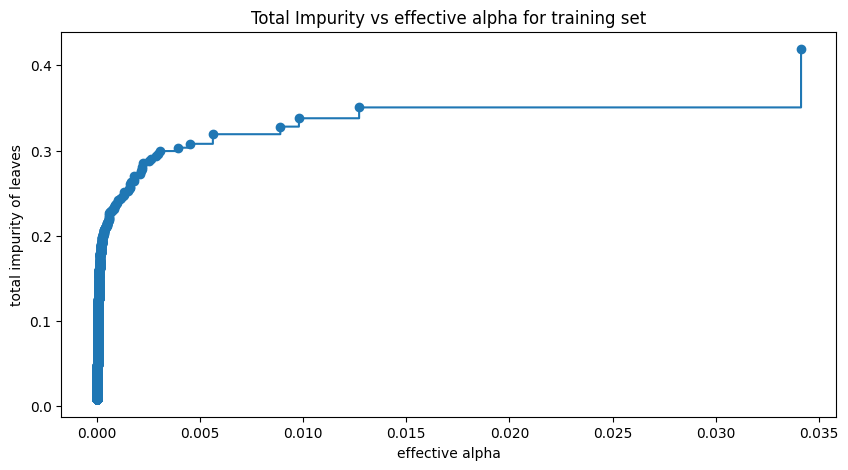

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now let's create a loop to plot all the alphas and see how the depth and number of nodes change with every alpha.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_t, y_train_t)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


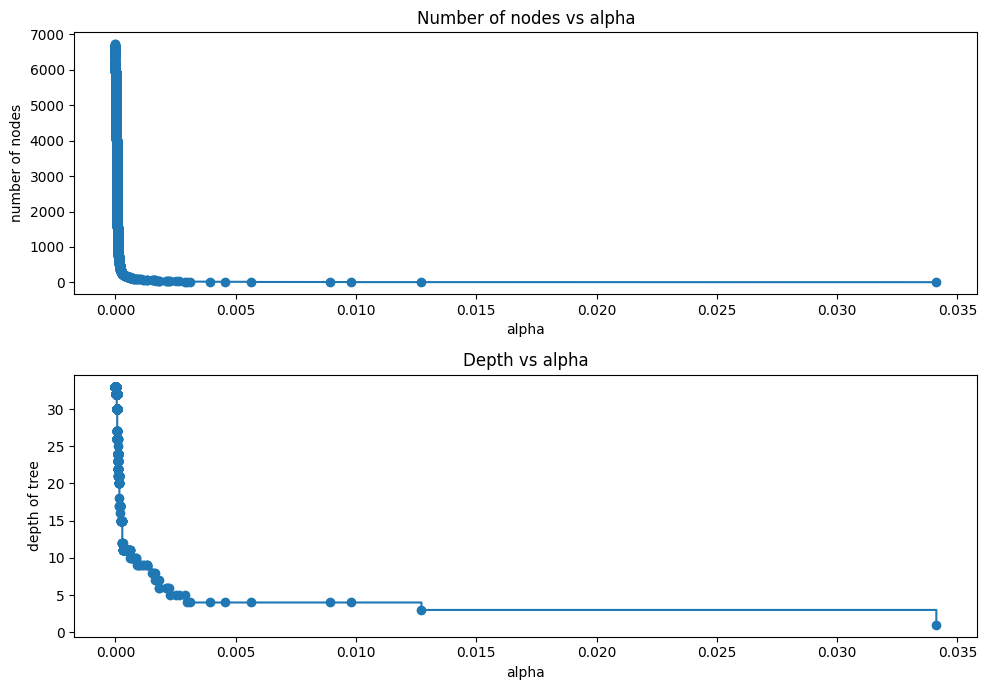

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- We see that when alphas are less than 0.005 and get closer to 0, the number of nodes and the depth increases dramatically.

### F1-score Improvement

Now we will find a new model that uses alpha to maximize the F1-score.

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train_t)
    values_train = f1_score(y_train_t, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_t)
    values_test = f1_score(y_test_t, pred_test)
    f1_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train_t, y_train_t) for clf in clfs]
test_scores = [clf.score(X_test_t, y_test_t) for clf in clfs]

Let's plot how the F1-score and Alpha values behave in the train vs test set

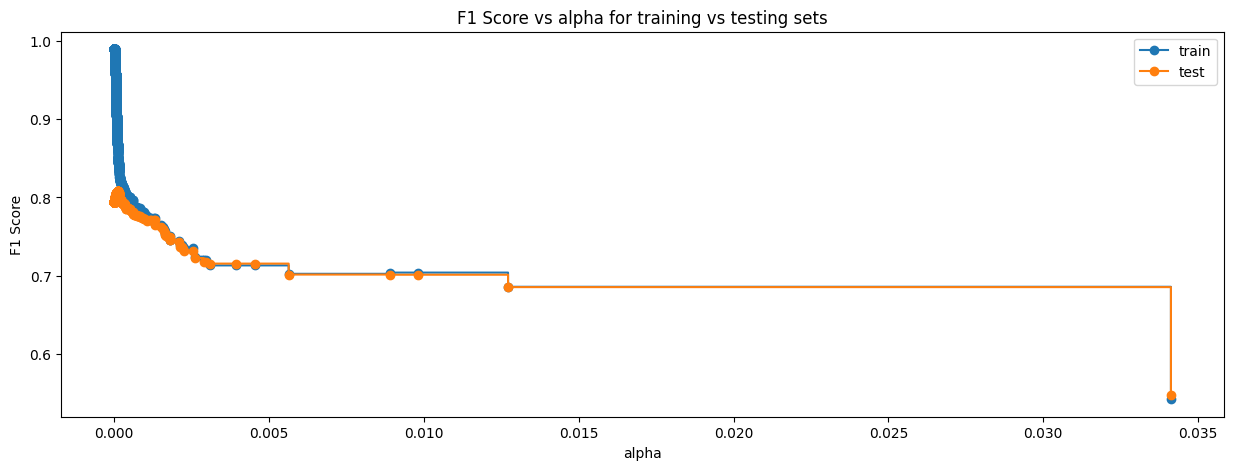

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training vs testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- On the most complex tree the test F1 score is ~80%, then it increases a bit with a lower alpha; less non-contributing nodes, and then decreases.
- The best F1 test score is around a pretty low alpha  ~0.001. Based on the depth vs alpha graph, we know that around that alpha ~0.001, the depth is ~10 or a bit lower.

Let's get the alpha that maximizes test F1 score and run the model.

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


The alpha that maximizes F1-score is ~0.0001.

Let's check performance:

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train_t, y_train_t
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.90005 0.90350    0.81361 0.85620

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test_t, y_test_t
)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86869 0.85576    0.76595 0.80837

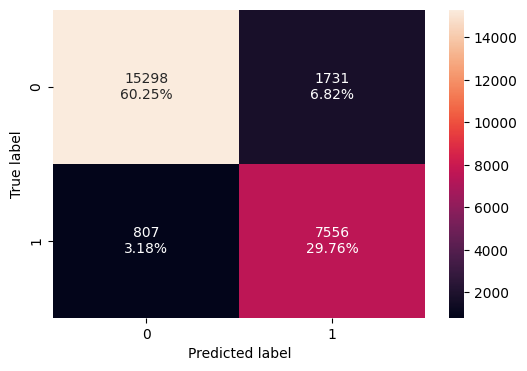

In [ ]:
confusion_matrix_sklearn(best_model, X_train_t, y_train_t)

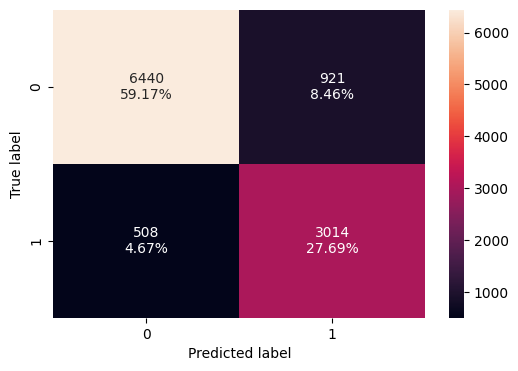

In [ ]:
confusion_matrix_sklearn(best_model, X_test_t, y_test_t)

- The model has better performance on train and test, but has a bit of overfitting. Probably due to the depth of the pruned tree with the highest F1 test score.

Let's see the tree:

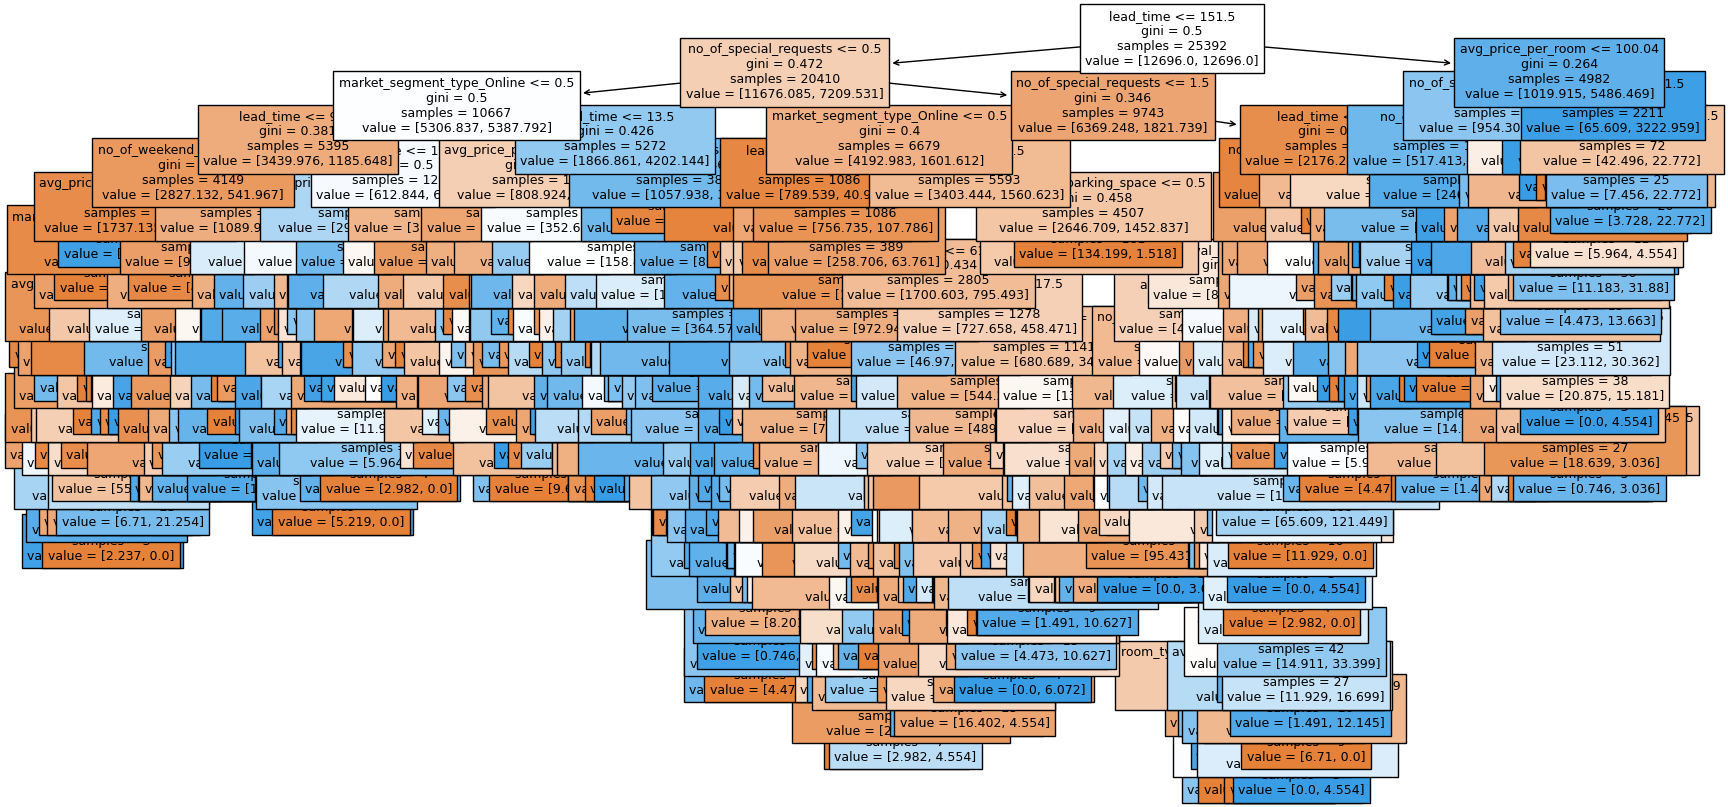

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

Important features:

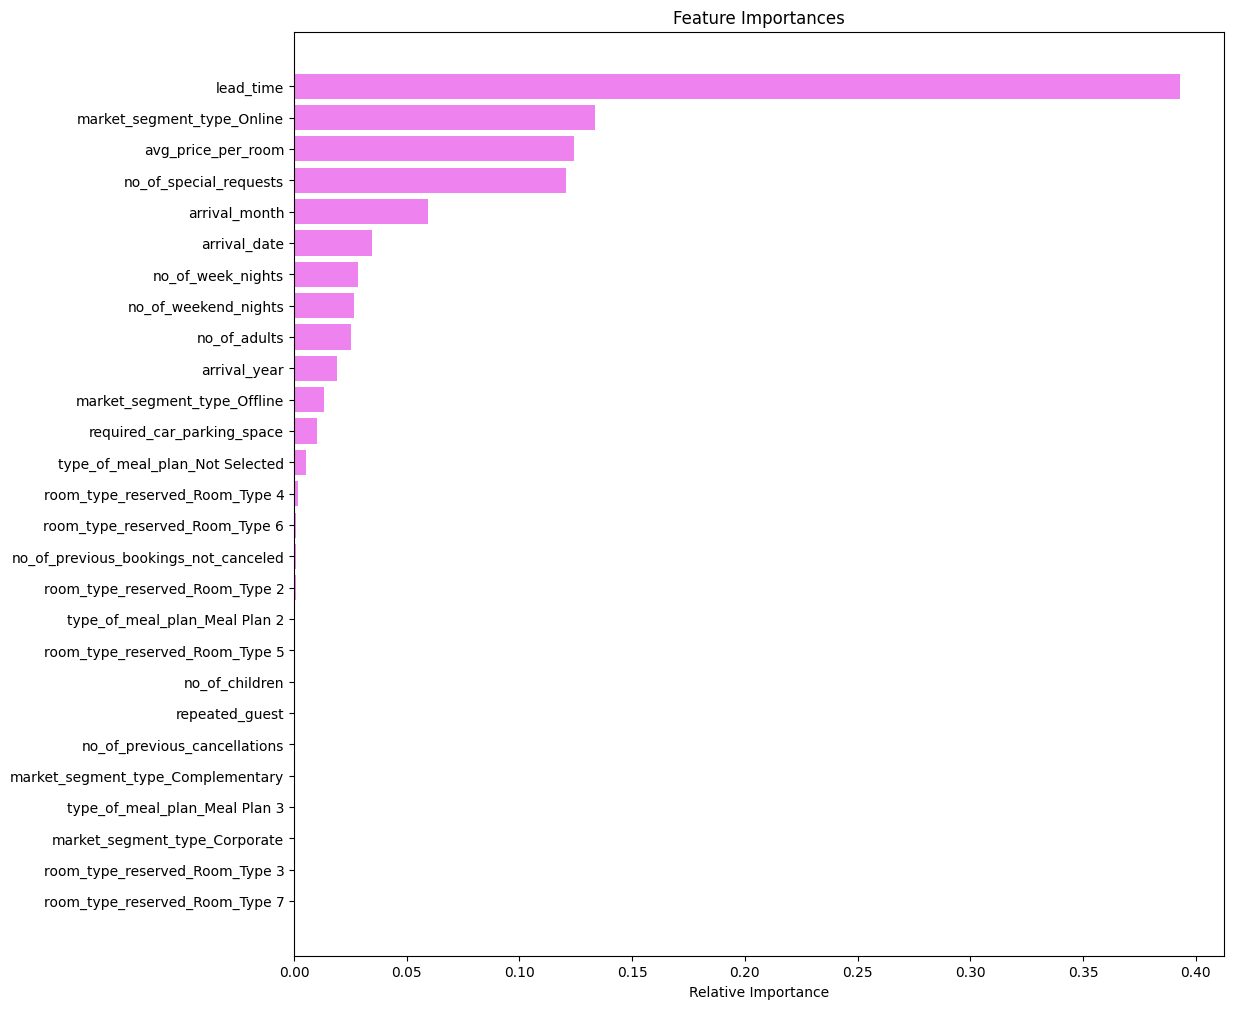

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Important features are pretty much the same
- The tree is too large and very hard to interpret.

## Model Performance Comparison and Conclusions

Training Performance Comparison of all models (log regression and decision tree):

In [ ]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_orig.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        log_perf_train.T,
        log_perf_train_auc_roc.T,
        log_perf_train_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree Original  Decision Tree (Pre-Pruning)  \
Accuracy                  0.99421                      0.83101   
Recall                    0.98661                      0.78620   
Precision                 0.99578                      0.72428   
F1                        0.99117                      0.75397   

           Decision Tree (Post-Pruning)  \
Accuracy                        0.90005   
Recall                          0.90350   
Precision                       0.81361   
F1                              0.85620   

           Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80659   
Recall                                         0.63253   
Precision                                      0.73946   
F1                                             0.68183   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.78434   
Recall                                0.76608   
Precision                             0.64354   
F1                                    0.69948   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80265  
Recall                                0.69864  
Precision                             0.69889  
F1                                    0.69877

Test Performance Comparison (log regression and decision tree)

In [ ]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_orig.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
        log_perf_test.T,
        log_perf_test_auc_roc.T,
        log_perf_test_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree Original  Decision Tree (Pre-Pruning)  \
Accuracy                  0.87108                      0.83497   
Recall                    0.81034                      0.78336   
Precision                 0.79521                      0.72758   
F1                        0.80270                      0.75444   

           Decision Tree (Post-Pruning)  \
Accuracy                        0.86869   
Recall                          0.85576   
Precision                       0.76595   
F1                              0.80837   

           Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80272   
Recall                                         0.62619   
Precision                                      0.73285   
F1                                             0.67534   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.77846   
Recall                                0.76612   
Precision                             0.63402   
F1                                    0.69384   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79656  
Recall                                0.69405  
Precision                             0.68788  
F1                                    0.69095

- Overall, the post-pruned tree has the best performance on test data, with less overfitting than the original model. However, the post-pruned tree has more overfitting than the pre-pruned tree.
- The pre-pruned tree has almost no overfitting and will probably be the most consistent tree.
- The original tree (most complex) has overfitting, but the test performance is not that bad. Based on the alphas, this specific dataset is suitable for very complex trees. For that reason, the tree that optimizes F1 is very close to the original one in terms of test performance, but with less overfitting.
- The post-pruned tree should be evaluated against a new dataset in order to confirm if the model suffers from severe overfitting, or if it's tolerable.


## Actionable Insights and Recommendations

***Insights:***

- We've been able to build multiple predictive models that can be used to predict if a booking will be canceled or not, but the best performing overall are the decision trees. The performance on logistic regression models is lower, therefore we infere that the patterns in the data are better suited for a decision tree model, instead of a sigmoid function.

- The pre-pruned tree is the most consistent model and it's able to predict if a booking is going to be canceled or not with an F1-score of 0.75 on the testing set.

- INN Hotels should also consider the post-pruned tree for prediction since it has a higher F1-score of 0.80. However, the model must be re-tested against a new data set to find out if the overfitting is tolerable or not.

- The most important features when predicting if a booking will be canceled or not, with relative importance above 5% are lead time, online market segment, average price per room, number of special requests, and arrival month.

- Example of interpretation of the decision tree: if the booking has a lead time <= 151.5 days, a number of special requests <= 0.5, the market segment type is not online, the lead time is <= 90.5 days, the number of weekend nights is <= 0.50, and the average price per room is > 196.5 euros, the booking will be most likely canceled. However, even if all the previous values hold true if the average price per room is <= 196.5 euros, the booking will most likely not be canceled. The tree can be interpreted, but due to the depth, there must be extra caution when analysing the values.

Based on the best logistic model, which still has predictive capabilities:

- A 1 unit increment in the number of previous cancelations increases the odds of canceling by ~0.33 times, or ~33%.

- Being a repeated guest decreases the odds of canceling by ~0.04 times, or decreases the odds of canceling by ~95%.

- A 1 unit change in the required parking space will decrease the odds of canceling by ~0.19 times, or decrease the odds of canceling by ~80%.

- A 1 unit change in the number of special requests will decrease the odds of canceling by ~0.22 times, or decrease the odds of canceling by ~77%.

- Compared to Online, Complementary, and Aviation segments (that were dropped), a booking made in the corporate segment will have ~0.41 times fewer odds of canceling, or a decrease of canceling odds by ~58%. Same case with the offline segment, that decreases ~0.16 times, or ~83%.

***Reccomendations:***

- A future analysis should be made to match the post-pruned tree against a new data set. If it performs well, the F1-score will increase and the prediction capabilities will increase.

- INN Hotels Group should incentivize marketing segments such as corporate and offline, through various strategies like giving special promotions, amenities, and extras. These would have a lower chance of canceling compared to the rest of marketing segments.

- INN Hotels Group should incentivize people to book in advance, for example, with special promotions and discounts. This way the lead time of those bookings would be higher and the chances of cancelling lower. Of course, this must be tested with a small fraction of the audience first.

- INN Hotels Group should A/B test certain canceling policies such as having special cancelation clauses if the reservation is made too close to the check-in date. In this case, the hotel could charge a late-cancelation fee, for example, of 25 %. This would be the approximate percentage the hotel would need to discount to the original booking price in order to sell it.

- If there are bookings that are very likely to be canceled, the hotels should try to sell the rooms to other customers as soon as possible, so the room price won't be negatively affected. This is a similar strategy to the flight companies.

- When the model predicts a FP and the room has already been sold to another guest, the hotel can have a backup plan and re-accommodate the guest in an empty room, or assign the room of another high-canceling probability booking. To incentivice the guest to re-accommodate, the hotel can offer a better meal plan, room, discount, etc. In the worst case, the hotel must issue a refund.